# King County 
# Housing Data EDA
------------
## Client
### William Rodriguez
------------
## Buyer Information
### 2 people, country (best timing & non-renovated) & city house (fast & central location), wants two houses
------------

### Setting-Up the Working Enviroment

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from geopy.distance import geodesic
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the Data

In [3]:
# Filepath
file_path = 'data/eda.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(file_path)

In [4]:
# Display first 5 rows of the dataset
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520     3.000      1.000     1180.000  5650.000   1.000         NaN   
1  6414100192     3.000      2.250     2570.000  7242.000   2.000       0.000   
2  5631500400     2.000      1.000      770.000 10000.000   1.000       0.000   
3  2487200875     4.000      3.000     1960.000  5000.000   1.000       0.000   
4  1954400510     3.000      2.000     1680.000  8080.000   1.000       0.000   

   view  condition  grade  ...  sqft_basement  yr_built  yr_renovated  \
0 0.000          3      7  ...          0.000      1955         0.000   
1 0.000          3      7  ...        400.000      1951     19910.000   
2 0.000          3      6  ...          0.000      1933           NaN   
3 0.000          5      7  ...        910.000      1965         0.000   
4 0.000          3      8  ...          0.000      1987         0.000   

   zipcode    lat     long  sqft_living15  sqft_lot15        date      price  
0    98178 47.511 -122.257       1340.000    5650.000  2014-10-13 221900.000  
1    98125 47.721 -122.319       1690.000    7639.000  2014-12-09 538000.000  
2    98028 47.738 -122.233       2720.000    8062.000  2015-02-25 180000.000  
3    98136 47.521 -122.393       1360.000    5000.000  2014-12-09 604000.000  
4    98074 47.617 -122.045       1800.000    7503.000  2015-02-18 510000.000  

[5 rows x 21 columns]

In [5]:
# Display last 5 rows of the dataset
df.tail()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
21592   263000018     3.000      2.500     1530.000  1131.000   3.000   
21593  6600060120     4.000      2.500     2310.000  5813.000   2.000   
21594  1523300141     2.000      0.750     1020.000  1350.000   2.000   
21595   291310100     3.000      2.500     1600.000  2388.000   2.000   
21596  1523300157     2.000      0.750     1020.000  1076.000   2.000   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
21592       0.000 0.000          3      8  ...          0.000      2009   
21593       0.000 0.000          3      8  ...          0.000      2014   
21594       0.000 0.000          3      7  ...          0.000      2009   
21595         NaN 0.000          3      8  ...          0.000      2004   
21596       0.000 0.000          3      7  ...          0.000      2008   

       yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  \
21592         0.000    98103 47.699 -122.346       1530.000    1509.000   
21593         0.000    98146 47.511 -122.362       1830.000    7200.000   
21594         0.000    98144 47.594 -122.299       1020.000    2007.000   
21595         0.000    98027 47.535 -122.069       1410.000    1287.000   
21596         0.000    98144 47.594 -122.299       1020.000    1357.000   

             date      price  
21592  2014-05-21 360000.000  
21593  2015-02-23 400000.000  
21594  2014-06-23 402101.000  
21595  2015-01-16 400000.000  
21596  2014-10-15 325000.000  

[5 rows x 21 columns]

In [6]:
# Columns in the dataframe
df.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price'],
      dtype='object')

All column names are lowercase and use underscores instead of spaces, so there is no need to modify the column names at this stage.

***Column Names and descriptions for King County Data Set***

| Column Header | Description |
|:- |:-|
| **id** | unique identified for a house |
| **bedrooms** | number of bedrooms |
| **bathrooms** | number of bathrooms |
| **sqft_living** | footage of the living space in squarefeet |
| **sqft_lot** | footage of the lot in squarefeet |
| **floors** | floors (levels) in the house |
| **waterfront** | house which has a view to a waterfront |
| **view** | quality of view |
| **condition** | how good the condition is (overall) |
| **grade** | overall grade given to the housing unit, based on King County grading system |
| **sqft_above** | square footage of house apart from basement in squaremeters |
| **sqft_basement** | square footage of the basement in squaremeters |
| **yr_built** | year when the house was built |
| **yr_renovated** | year when house was renovated the last time |
| **zipcode** | zip code |
| **lat** | latitude coordinate |
| **long** | longitude coordinate |
| **sqft_living15** | the square footage of interior housing living space for the nearest 15 neighbors in squarefeet |
| **sqft_lot15** | the square footage of the land lots of the nearest 15 neighbors in squarefeet |
| **date** | date when house was sold |
| **price** | at which the house was sold |

In [7]:
# Shape of the dataset (length and width)
df.shape

(21597, 21)

There are 21597 rows and 21 columns in the dataset.

In [8]:
# Checking for the data-types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [9]:
# Checking for missing values ('NaN'/'None')
df.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

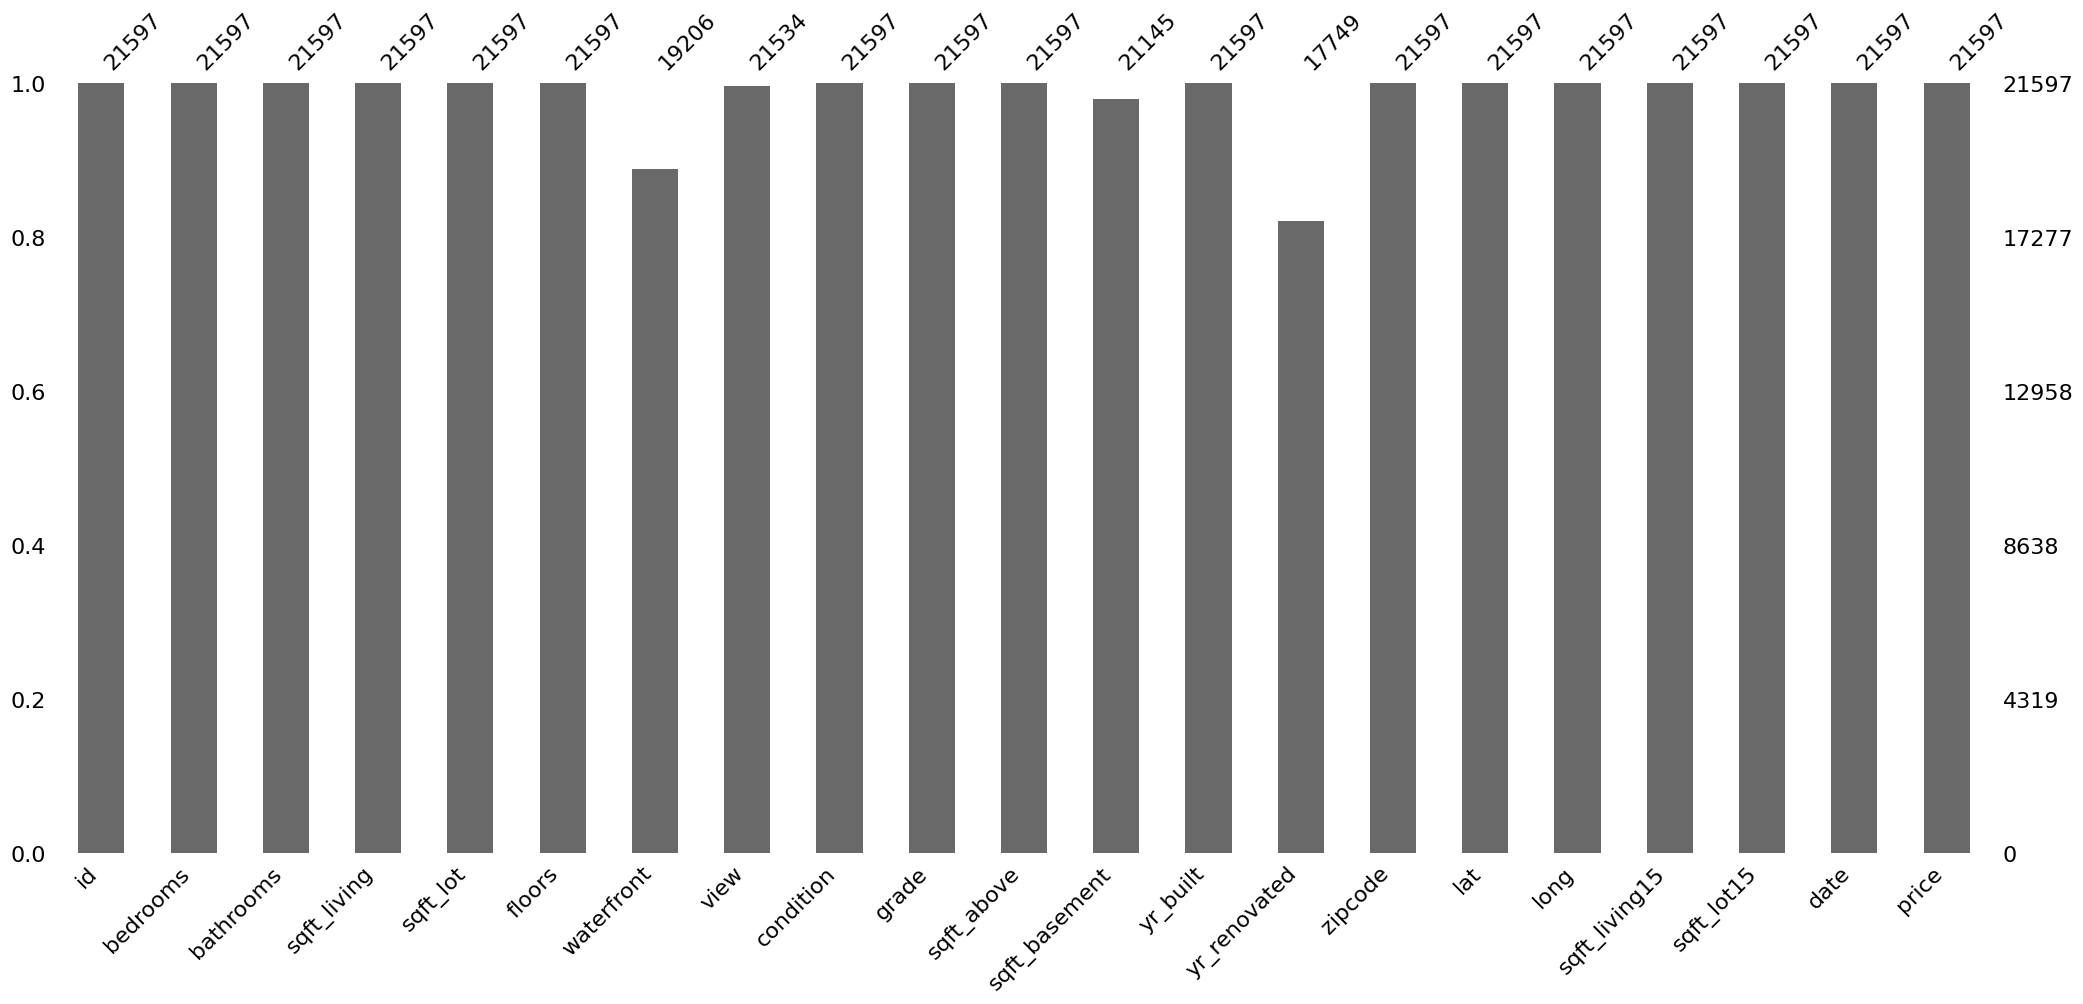

In [10]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

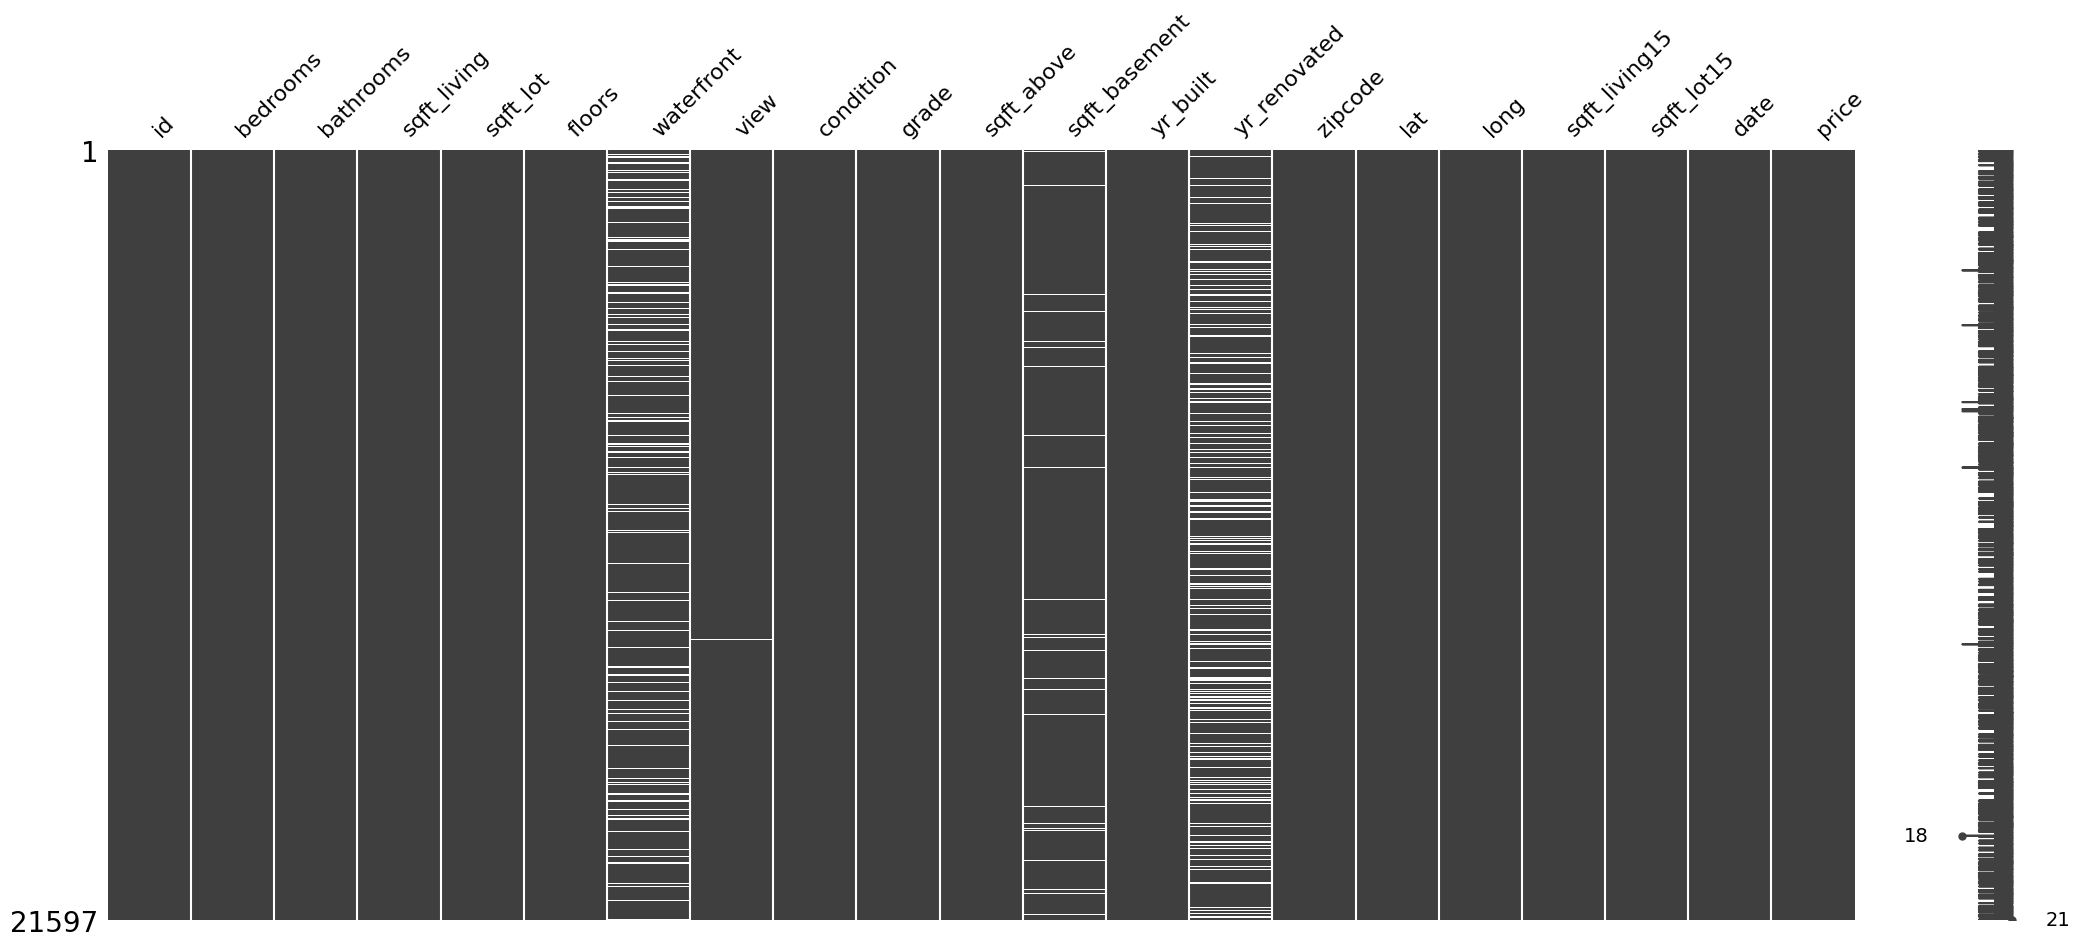

In [11]:
# plotting the matrix of missing values
msno.matrix(df)

There are few instances where missing values co-occur, and there appears to be no discernible pattern in the distribution of missing data. Consequently, it seems that the missing data occurs randomly.

**Data-types**  
| Data-Type | Result |
|:-|:-|
| *object* | There is only 1 feature (column) with an object data-type in our dataset: 'date'. This means, there are strings or mixed data-types in this column. <br> - Since 'date' means the date when house was sold, this needs to be changed into a datetime format. |
| *int64* | Furthermore there are 5 features (columns) with integer data-types: 'id', 'condition', 'grade', 'yr_built', and 'zipcode'. <br> - For 'id' and 'zipcode', integer numerical values are expected. <br> - 'yr_built' means the year when house was built. However, since the datetime data-type does not allow for displaying the year only, this feature is kept in the datatype integer.<br> - The numerical values of 'condition' and 'grade' likely are categories and, hence, will be changed to appropiate categorial labels when plotting figures. |
| *float65* | Floats are the data-types of the remaining 15 features (columns): 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15' and 'price'. <br> - Since 'bathrooms' and 'floors' can be *.5 and 'lat', 'long' are coordinates, having naturally decimal places, their data type has not to be changed.  <br> - The number of 'bedrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15' and 'price' have no decimal places other than zeroth (see test below), therefore can be changed to integers.  <br> - 'view' contains categorial numbers (integers) and will be changed to strings with appropiate bin names.  <br> - 'waterfront' only contains '1' and '0' (as well as NaN) for 'yes' and 'no' presumably (see test below) and can therefore be changed to boolian data type.  <br> - 'yr_renovated' is a date that only contains a year. Years cannot be independently represented in datetime format. Therefore, it will be changed to integer data type. |
  
 **Missing values** 
 
 The columns of the features 'waterfront', 'view', 'sqft_basement' and 'yr_renovated' have cell values of NaN/None, indicating missing data. <br> Except for these columns, we have 21597 non-null values in each of the other columns, which is exactly the same number as we have rows.   
 <br> Meaning: We only seem to have missing values in the columns 'waterfront', 'view', 'sqft_basement' and 'yr_renovated'.

In [12]:
#Check which float columns in a DataFrame can be converted to integer data types
can_be_int = {}

# Iterate through columns in the DataFrame
for column in df.columns:
    # Check if the column data type is float
    if pd.api.types.is_float_dtype(df[column]):
        # Check if the float values only have a zero decimal part by comparing with their integer conversion
        # Use dropna() to ignore NaN values as NaN cannot be compared to integers
        can_be_int[column] = np.all((df[column].dropna() == df[column].dropna().astype(int)))

# Print the result
print(can_be_int)


{'bedrooms': True, 'bathrooms': False, 'sqft_living': True, 'sqft_lot': True, 'floors': False, 'waterfront': True, 'view': True, 'sqft_above': True, 'sqft_basement': True, 'yr_renovated': True, 'lat': False, 'long': False, 'sqft_living15': True, 'sqft_lot15': True, 'price': True}


In [13]:
# Check for the number of unique values in 'waterfront'
df['waterfront'].nunique()

2

In [14]:
# Check for the unique values in 'waterfront'
df['waterfront'].unique()

array([nan,  0.,  1.])

In [15]:
# Examining the descriptive statistics of the dataset
df.describe()


id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21597.000 21597.000  21597.000    21597.000   21597.000 21597.000   
mean  4580474287.771     3.373      2.116     2080.322   15099.409     1.494   
std   2876735715.748     0.926      0.769      918.106   41412.637     0.540   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123049175.000     3.000      1.750     1430.000    5040.000     1.000   
50%   3904930410.000     3.000      2.250     1910.000    7618.000     1.500   
75%   7308900490.000     4.000      2.500     2550.000   10685.000     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   

       waterfront      view  condition     grade  sqft_above  sqft_basement  \
count   19206.000 21534.000  21597.000 21597.000   21597.000      21145.000   
mean        0.008     0.234      3.410     7.658    1788.597        291.857   
std         0.087     0.766      0.651     1.173     827.760        442.491   
min         0.000     0.000      1.000     3.000     370.000          0.000   
25%         0.000     0.000      3.000     7.000    1190.000          0.000   
50%         0.000     0.000      3.000     7.000    1560.000          0.000   
75%         0.000     0.000      4.000     8.000    2210.000        560.000   
max         1.000     4.000      5.000    13.000    9410.000       4820.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 21597.000     17749.000 21597.000 21597.000 21597.000      21597.000   
mean   1971.000       836.651 98077.952    47.560  -122.214       1986.620   
std      29.375      4000.111    53.513     0.139     0.141        685.230   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1951.000         0.000 98033.000    47.471  -122.328       1490.000   
50%    1975.000         0.000 98065.000    47.572  -122.231       1840.000   
75%    1997.000         0.000 98118.000    47.678  -122.125       2360.000   
max    2015.000     20150.000 98199.000    47.778  -121.315       6210.000   

       sqft_lot15       price  
count   21597.000   21597.000  
mean    12758.284  540296.574  
std     27274.442  367368.140  
min       651.000   78000.000  
25%      5100.000  322000.000  
50%      7620.000  450000.000  
75%     10083.000  645000.000  
max    871200.000 7700000.000

### Research Questions and Hypothesis Generation

| # | Question | Hypothesis | Indicators |
|:-:|:-|:-|:-|
| 1 | How does the location (country vs. city) affect house prices and availability? | *"Location Impact Hypothesis"*: <br> City houses command higher prices than country houses due to increased demand for central locations, but the availability may be lower. | a) *Location (zipcode, lat, long)*: <br> Differentiate between country and city houses and evaluate central locations. Leverage zipcode, lat, and long to compare pricing, availability, and features of country vs. city houses (Comparative Location Analysis). For city houses, calculate distances from key city center landmarks (requiring additional data or assumptions based on lat and long - define city center and calculate the distance) to analyze price gradients and availability (Proximity Evaluation). |
| 2 | How does the size of a house (in terms of bedrooms and bathrooms) correlate with its suitability and value for a two-person household looking to purchase in both country and city locations? | *"Size Hypothesis"*: <br> For a two-person household, houses with fewer bedrooms (e.g., 1-2 bedrooms) and bathrooms are more cost-effective than larger properties. | a) *Number of Bedrooms (bedrooms)*: <br> To analyze the correlation between the house size suitable for two people and its market value. <br> b) *Number of Bathrooms (bathrooms)*: <br> To further refine the suitability analysis based on common needs for a two-person household. <br> c) *Square Footage of the Home (sqft_living)*: <br> To consider the overall living space, which is particularly relevant for understanding comfort and suitability for the household size. |
| 3 | Does the age and the condition of a house affect the price? | *"Condition Hypothesis"*: <br> Newer and better-maintained houses command higher prices than older and less well-maintained ones. | a) *Age of the House (yr_built)*: <br> This can be directly used to assess the age of the house. Consider calculating the "actual age" of the house at the time it was sold, which could involve subtracting 'yr_built' from the year in the date column. <br> b) *Condition of the House (condition)*: <br> This column rates the overall condition of the house and can be used to evaluate how well-maintained the house is. <br> c) *Year Renovated (yr_renovated)*: <br> This can provide additional insights into the condition and up-to-dateness of the house. A recent renovation could significantly impact the house's perceived value, even if the house itself is older. Consider creating a binary indicator for whether the house has been renovated at all, or calculate how recently the renovation occurred (e.g., years since the last renovation). <br> d) *Grade (grade)*: Although not directly mentioned in the hypothesis, the overall grade given to the housing unit could serve as a proxy for its quality, including factors related to its construction, design, and functionality, which are likely correlated with both age and condition. <br> d) *Price (price)*: <br> As the outcome variable, the price at which the house was sold will be the primary indicator of market value you’re trying to explain or predict. |
| 4 | What is the optimal timing to buy a house in the country to get the best deal? | *"Optimal Timing Hypothesis"*: <br> There are seasonal trends in house pricing and availability, with certain times of the year offering better deals, especially for country houses. | a) *Date of Sale (date)*: <br> Analyze seasonal trends and optimal buying times. (seasonal analysis). Use the 'date' column to identify patterns or trends in pricing and availability over different months or seasons. |

### Cleaning the Data

**Droping Columns**  
Since most of the, if not all, columns in the dataset are interesting with respect to the questions, hypotheses and indicators above, none of them will be drop to make the exploration more streamlined.

In [16]:
# drop columns that are not needed
# df.drop(["colunm_name"], axis=1, inplace=True)

**Transforming Data-Types**

As stated above, in some of the columns the data-types need to be transformed:

| Feature | Convert values to format |
|:-|:-|
| 'date' | datetime |
| 'yr_renovated', bedrooms', 'sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price' | integer |
| 'waterfront' | boolian |
| 'view' | string |

In [17]:
# Convert values of the into datetime format
df['date'] = pd.to_datetime(df['date'], format='mixed', yearfirst=True)

In [18]:
# Convert values into integer format
df['yr_renovated'].replace(np.nan, 0.000, inplace=True) # Replace the NaN ventries by 0.000 in order to convert to integer.
df['yr_renovated'] = (df['yr_renovated'] / 10) # Correct for the factor 10 in the data.
df['yr_renovated'] = df['yr_renovated'].astype('int64') # Convert float64 into int64.
df['yr_renovated'] = df['yr_renovated'].replace(0, pd.NA) # Replace 0's by <NA>, because the renovation has actually not happened on these houses.

df['bedrooms'] = df['bedrooms'].astype('int64')

df['sqft_living'] = df['sqft_living'].astype('int64')

df['sqft_lot'] = df['sqft_lot'].astype('int64')

df['sqft_above'] = df['sqft_above'].astype('int64')

df['sqft_basement'].replace(np.nan, -1.000, inplace=True) # Replace the NaN ventries by -1.000 as a placeholder in order to convert to integer.
df['sqft_basement'] = df['sqft_basement'].astype('int64') # Convert float64 into int64.
df['sqft_basement'] = df['sqft_basement'].replace(-1, pd.NA) # Replace -1's by <NA>, because the basement actually does not exist in these houses.

df['sqft_living15'] = df['sqft_living15'].astype('int64')

df['sqft_lot15'] = df['sqft_lot15'].astype('int64')

df['price'] = df['price'].astype('int64')

In [19]:
# Convert values into boolean format
df['waterfront'] = df['waterfront'].map({0.000: False, 1.000: True, np.nan: np.nan}) # Convert the column to boolean, preserving NaN

df['waterfront'] = df['waterfront'].astype('boolean')  # Convert the dtype to nullable boolean ('boolean')

In [20]:
# Convert values into string format

print(df['view'].unique()) # Check for the numeric bins

    # Define a dictionary for mapping numeric categories to string names
view_categories = {
    0.000: "No View",
    1.000: "Limited View",
    2.000: "Partial View",
    3.000: "Good View",
    4.000: "Excellent View"
}
    # Use .map() to apply the mapping, passing the dictionary directly
    # NaN values will be automatically preserved by .map()
df['view_cat'] = df['view'].map(view_categories)

df.head()

[ 0. nan  3.  4.  2.  1.]


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...  yr_built yr_renovated  zipcode    lat  \
0 0.000          3      7  ...      1955         <NA>    98178 47.511   
1 0.000          3      7  ...      1951         1991    98125 47.721   
2 0.000          3      6  ...      1933         <NA>    98028 47.738   
3 0.000          5      7  ...      1965         <NA>    98136 47.521   
4 0.000          3      8  ...      1987         <NA>    98074 47.617   

      long  sqft_living15  sqft_lot15       date   price view_cat  
0 -122.257           1340        5650 2014-10-13  221900  No View  
1 -122.319           1690        7639 2014-12-09  538000  No View  
2 -122.233           2720        8062 2015-02-25  180000  No View  
3 -122.393           1360        5000 2014-12-09  604000  No View  
4 -122.045           1800        7503 2015-02-18  510000  No View  

[5 rows x 22 columns]

**Rounding Floats**

Floats (decimal numbers) should be displayed rounded only to the last non-zero decimal.

Float Data Type

| Feature that is a float data-type | Last non-zero decimal place |
|:-|:-|
| 'bathrooms' | 2 |
| 'floors' | 1 |
| 'lat' | 3 |
| 'long' | 3 |

Since 'lat' and 'long' are already 3 decimals long, only 'bathrooms' and 'floors' need to be rounded.

In [21]:
# Round the values of the feature 'bathrooms' in the specific column to 2 decimal places
df['bathrooms'] = df['bathrooms'].round(2)

# Round the values of the feature 'floors' in the specific column to 1 decimal place
df['floors'] = df['floors'].round(1)

In [22]:
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...  yr_built yr_renovated  zipcode    lat  \
0 0.000          3      7  ...      1955         <NA>    98178 47.511   
1 0.000          3      7  ...      1951         1991    98125 47.721   
2 0.000          3      6  ...      1933         <NA>    98028 47.738   
3 0.000          5      7  ...      1965         <NA>    98136 47.521   
4 0.000          3      8  ...      1987         <NA>    98074 47.617   

      long  sqft_living15  sqft_lot15       date   price view_cat  
0 -122.257           1340        5650 2014-10-13  221900  No View  
1 -122.319           1690        7639 2014-12-09  538000  No View  
2 -122.233           2720        8062 2015-02-25  180000  No View  
3 -122.393           1360        5000 2014-12-09  604000  No View  
4 -122.045           1800        7503 2015-02-18  510000  No View  

[5 rows x 22 columns]

**Dealing with Duplicate Rows**  
Check if rows appear multiple times in the dataset.

In [23]:
# check for duplicate rows in the id column
df["id"].duplicated().value_counts()

id
False    21420
True       177
Name: count, dtype: int64

The dataset contains data on 21,420 individual houses, spanning 21,597 rows. As a result, the 21,597 rows do not represent unique houses; instead, there are 21,420 unique properties. The presence of 177 duplicate rows suggests that several houses might have been sold more than once.

To determine whether these rows are exact duplicates or if the houses have been sold multiple times, the next step will involve checking the 'date' column for duplicate entries.



In [24]:
# Filter the DataFrame to include only rows with duplicated 'id'
duplicates_df = df[df["id"].duplicated(keep=False)]

# Check for duplicate rows based on both 'id' and 'date'
duplicates_id_date = duplicates_df.duplicated(subset=['id', 'date'], keep=False).value_counts()

print(duplicates_id_date)


False    353
Name: count, dtype: int64


There are no duplicates based on 'id' and 'date' together. Therefore, these houses have been sold multiple times throughout their lifespan, causing them to appear in the dataset more than once.

To ensure the presentation of the most current house pricing, only the latest sales transactions will be retained. This will be achieved by sorting these entries by 'date' in descending order and retaining only the first occurrence, thereby eliminating any older duplicates.

In [25]:
# Remove duplicates that are not the most recent sellings.

# Step 1: Sort the DataFrame by 'id' and 'date' in descending order
df_sorted = df.sort_values(by=['id', 'date'], ascending=[True, False])

# Step 2: Drop duplicates based on 'id', keeping the first (most recent date) occurrence
df_no_older_duplicates = df_sorted.drop_duplicates(subset='id', keep='first')

# Step 3: Sort the DataFrame back to its original order if needed
df = df_no_older_duplicates.sort_index()

# The df now contains your DataFrame without the older duplicates

In [26]:
# check result
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...  yr_built yr_renovated  zipcode    lat  \
0 0.000          3      7  ...      1955         <NA>    98178 47.511   
1 0.000          3      7  ...      1951         1991    98125 47.721   
2 0.000          3      6  ...      1933         <NA>    98028 47.738   
3 0.000          5      7  ...      1965         <NA>    98136 47.521   
4 0.000          3      8  ...      1987         <NA>    98074 47.617   

      long  sqft_living15  sqft_lot15       date   price view_cat  
0 -122.257           1340        5650 2014-10-13  221900  No View  
1 -122.319           1690        7639 2014-12-09  538000  No View  
2 -122.233           2720        8062 2015-02-25  180000  No View  
3 -122.393           1360        5000 2014-12-09  604000  No View  
4 -122.045           1800        7503 2015-02-18  510000  No View  

[5 rows x 22 columns]

**Build new columns/ Feature engineering**  
1. Calculate the Distance Fom Seattle's Center <br>
According to Google Maps, the center of Seattle is located at latitude 47.6062 and longitude -122.3321. Using the geodesic method, the distance in miles from this central point is calculated and subsequently appended to the DataFrame as a new column named 'dist_center'.

In [27]:
# Define the center of Seattle
seattle_center = (47.6062, -122.3321)

# Function to calculate distance to the center of Seattle for each house
def distance_to_center(row):
    house_location = (row['lat'], row['long'])
    return geodesic(seattle_center, house_location).miles

# Apply the function row-wise and create a new column 'dist_center'
df['mile_dist_center'] = df.apply(distance_to_center, axis=1)

# Display columns and the first 15 rows of the DataFrame
print(df.columns)
df.head(15)


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'view_cat',
       'mile_dist_center'],
      dtype='object')


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   7129300520         3      1.000         1180      5650   1.000   
1   6414100192         3      2.250         2570      7242   2.000   
2   5631500400         2      1.000          770     10000   1.000   
3   2487200875         4      3.000         1960      5000   1.000   
4   1954400510         3      2.000         1680      8080   1.000   
5   7237550310         4      4.500         5420    101930   1.000   
6   1321400060         3      2.250         1715      6819   2.000   
7   2008000270         3      1.500         1060      9711   1.000   
8   2414600126         3      1.000         1780      7470   1.000   
9   3793500160         3      2.500         1890      6560   2.000   
10  1736800520         3      2.500         3560      9796   1.000   
11  9212900260         2      1.000         1160      6000   1.000   
12   114101516         3      1.000         1430     19901   1.500   
13  6054650070         3      1.750         1370      9680   1.000   
14  1175000570         5      2.000         1810      4850   1.500   

    waterfront  view  condition  grade  ...  yr_renovated zipcode    lat  \
0         <NA> 0.000          3      7  ...          <NA>   98178 47.511   
1        False 0.000          3      7  ...          1991   98125 47.721   
2        False 0.000          3      6  ...          <NA>   98028 47.738   
3        False 0.000          5      7  ...          <NA>   98136 47.521   
4        False 0.000          3      8  ...          <NA>   98074 47.617   
5        False 0.000          3     11  ...          <NA>   98053 47.656   
6        False 0.000          3      7  ...          <NA>   98003 47.310   
7        False   NaN          3      7  ...          <NA>   98198 47.410   
8        False 0.000          3      7  ...          <NA>   98146 47.512   
9        False 0.000          3      7  ...          <NA>   98038 47.368   
10        <NA> 0.000          3      8  ...          <NA>   98007 47.601   
11       False 0.000          4      7  ...          <NA>   98115 47.690   
12       False 0.000          4      7  ...          <NA>   98028 47.756   
13       False 0.000          4      7  ...          <NA>   98074 47.613   
14       False 0.000          3      7  ...          <NA>   98107 47.670   

       long  sqft_living15  sqft_lot15       date    price  view_cat  \
0  -122.257           1340        5650 2014-10-13   221900   No View   
1  -122.319           1690        7639 2014-12-09   538000   No View   
2  -122.233           2720        8062 2015-02-25   180000   No View   
3  -122.393           1360        5000 2014-12-09   604000   No View   
4  -122.045           1800        7503 2015-02-18   510000   No View   
5  -122.005           4760      101930 2014-05-12  1230000   No View   
6  -122.327           2238        6819 2014-06-27   257500   No View   
7  -122.315           1650        9711 2015-01-15   291850       NaN   
8  -122.337           1780        8113 2015-04-15   229500   No View   
9  -122.031           2390        7570 2015-03-12   323000   No View   
10 -122.145           2210        8925 2015-04-03   662500   No View   
11 -122.292           1330        6000 2014-05-27   468000   No View   
12 -122.229           1780       12697 2014-05-28   310000   No View   
13 -122.045           1370       10208 2014-10-07   400000   No View   
14 -122.394           1360        4850 2015-03-12   530000   No View   

   mile_dist_center  
0             7.444  
1             7.955  
2            10.206  
3             6.551  
4            13.432  
5            15.660  
6            20.485  
7            13.612  
8             6.491  
9            21.649  
10            8.750  
11            6.085  
12           11.400  
13           13.421  
14            5.271  

[15 rows x 23 columns]

2. Calculate the actual age at the time a house was sold.

In [28]:
df['yrs_age_sold'] = df['date'].dt.year - df['yr_built']

print(df.columns)
df.head()

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'view_cat',
       'mile_dist_center', 'yrs_age_sold'],
      dtype='object')


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...  zipcode    lat     long sqft_living15  \
0 0.000          3      7  ...    98178 47.511 -122.257          1340   
1 0.000          3      7  ...    98125 47.721 -122.319          1690   
2 0.000          3      6  ...    98028 47.738 -122.233          2720   
3 0.000          5      7  ...    98136 47.521 -122.393          1360   
4 0.000          3      8  ...    98074 47.617 -122.045          1800   

   sqft_lot15       date   price  view_cat  mile_dist_center yrs_age_sold  
0        5650 2014-10-13  221900   No View             7.444           59  
1        7639 2014-12-09  538000   No View             7.955           63  
2        8062 2015-02-25  180000   No View            10.206           82  
3        5000 2014-12-09  604000   No View             6.551           49  
4        7503 2015-02-18  510000   No View            13.432           28  

[5 rows x 24 columns]

3. Calculate a binary indicator, wether the house was renovated at all.

In [29]:
# Using lambda function and apply()
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'unrenovated' if pd.isna(x) else 'renovated')

print(df.columns)
df.head()

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'view_cat',
       'mile_dist_center', 'yrs_age_sold', 'renovation_status'],
      dtype='object')


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...    lat     long  sqft_living15 sqft_lot15  \
0 0.000          3      7  ... 47.511 -122.257           1340       5650   
1 0.000          3      7  ... 47.721 -122.319           1690       7639   
2 0.000          3      6  ... 47.738 -122.233           2720       8062   
3 0.000          5      7  ... 47.521 -122.393           1360       5000   
4 0.000          3      8  ... 47.617 -122.045           1800       7503   

        date   price  view_cat  mile_dist_center  yrs_age_sold  \
0 2014-10-13  221900   No View             7.444            59   
1 2014-12-09  538000   No View             7.955            63   
2 2015-02-25  180000   No View            10.206            82   
3 2014-12-09  604000   No View             6.551            49   
4 2015-02-18  510000   No View            13.432            28   

  renovation_status  
0       unrenovated  
1         renovated  
2       unrenovated  
3       unrenovated  
4       unrenovated  

[5 rows x 25 columns]

4. Calculate the years since renovation.

In [30]:
df['yrs_since_renovation'] = df['date'].dt.year - df['yr_renovated']

print(df.columns)
df.head()

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'view_cat',
       'mile_dist_center', 'yrs_age_sold', 'renovation_status',
       'yrs_since_renovation'],
      dtype='object')


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...     long sqft_living15  sqft_lot15       date  \
0 0.000          3      7  ... -122.257          1340        5650 2014-10-13   
1 0.000          3      7  ... -122.319          1690        7639 2014-12-09   
2 0.000          3      6  ... -122.233          2720        8062 2015-02-25   
3 0.000          5      7  ... -122.393          1360        5000 2014-12-09   
4 0.000          3      8  ... -122.045          1800        7503 2015-02-18   

    price  view_cat  mile_dist_center  yrs_age_sold  renovation_status  \
0  221900   No View             7.444            59        unrenovated   
1  538000   No View             7.955            63          renovated   
2  180000   No View            10.206            82        unrenovated   
3  604000   No View             6.551            49        unrenovated   
4  510000   No View            13.432            28        unrenovated   

  yrs_since_renovation  
0                 <NA>  
1                   23  
2                 <NA>  
3                 <NA>  
4                 <NA>  

[5 rows x 26 columns]

4.  Calculate the price per squarefeet for later comparison.

In [31]:
df['price_per_sqft'] = df['price'] / df['sqft_living']

print(df.columns)
df.head()


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'view_cat',
       'mile_dist_center', 'yrs_age_sold', 'renovation_status',
       'yrs_since_renovation', 'price_per_sqft'],
      dtype='object')


id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...  sqft_living15 sqft_lot15       date   price  \
0 0.000          3      7  ...           1340       5650 2014-10-13  221900   
1 0.000          3      7  ...           1690       7639 2014-12-09  538000   
2 0.000          3      6  ...           2720       8062 2015-02-25  180000   
3 0.000          5      7  ...           1360       5000 2014-12-09  604000   
4 0.000          3      8  ...           1800       7503 2015-02-18  510000   

   view_cat  mile_dist_center  yrs_age_sold  renovation_status  \
0   No View             7.444            59        unrenovated   
1   No View             7.955            63          renovated   
2   No View            10.206            82        unrenovated   
3   No View             6.551            49        unrenovated   
4   No View            13.432            28        unrenovated   

   yrs_since_renovation price_per_sqft  
0                  <NA>        188.051  
1                    23        209.339  
2                  <NA>        233.766  
3                  <NA>        308.163  
4                  <NA>        303.571  

[5 rows x 27 columns]

5.  Categorize the houses in houses that are in the 'city' of Seattle and on the 'countryside' around Seattle.

    There are several ways to do that:

    - Geographic Boundaries
    If you know the geographic boundaries that typically separate urban from rural areas around Seattle, you can categorize houses based on whether their coordinates fall within those boundaries.

    - Population Density
    Areas with higher population densities are typically considered urban, while lower densities suggest rural areas. If you have access to population density data by region, you could use this to categorize houses.

    - Proximity to City Center
    A common approach is to define a distance from a central point in the city (e.g., downtown Seattle) and classify houses within a certain radius as "city" and those outside as "countryside." This method assumes that urban characteristics diminish with distance from the city center.

    - Use of Administrative Boundaries
    Utilizing administrative boundaries such as city limits or postal codes (zipcodes) can also help. Houses within city limits might be classified as "city," while those outside could be considered "countryside."

    The data given in the dataframe allows in principle for using the proximitty to the city center (features: 'lan', 'long') as well as the use of administrative boundaries (feature: 'zipcode'). Since Seattle is rather elongated along the sea, the (radial) proximitty method might not reflect the city / countrside boundary well. Therefore, in the following, the administrative boundaries will be used for the classification.

    Seattle, being a major city, encompasses a variety of ZIP codes across its diverse neighborhoods. While the list of ZIP codes can evolve slightly over time due to changes in postal routes or city planning decisions, here's a comprehensive list of ZIP codes generally considered to be within Seattle city limits as of my last update bases on the webpage of the city of Seattle (https://www.seattle.gov):

    | Zipcode | Name of the District |
    |:-|:-|
    | 98101 | Downtown Seattle |
    | 98102 | Capitol Hill |
    | 98103 | Greenwood, Fremont, Green Lake |
    | 98104 | Pioneer Square, Chinatown |
    | 98105 | University District, Laurelhurst |
    | 98106 | West Seattle, South Park |
    | 98107 | Ballard |
    | 98108 | Georgetown, South Park |
    | 98109 | South Lake Union, Queen Anne |
    | 98112 | Madison Park, Capitol Hill |
    | 98115 | Ravenna, Wedgwood |
    | 98116 | West Seattle |
    | 98117 | Ballard, Crown Hill |
    | 98118 | Rainier Valley, Seward Park |
    | 98119 | Queen Anne |
    | 98121 | Belltown, Downtown Seattle |
    | 98122 | Central District, Capitol Hill |
    | 98125 | Lake City, Northgate |
    | 98126 | West Seattle |
    | 98133 | North Seattle, part of Shoreline |
    | 98134 | Industrial District |
    | 98136 | West Seattle |
    | 98144 | Mount Baker, Leschi, Beacon Hill |
    | 98146 | West Seattle, part of Burien |
    | 98154 | Downtown Seattle (mostly commercial) |
    | 98164 | Downtown Seattle (PO boxes) |
    | 98174 | Downtown Seattle (PO boxes) |
    | 98177 | North Seattle, part of Shoreline |
    | 98178 | Rainier Beach, Skyway (parts) |
    | 98195 | University of Washington Campus |
    | 98199 | Magnolia |

    Note: ZIP codes like 98133 and 98177 also cover areas in the city of Shoreline, which is directly north of Seattle, and 98146 includes parts of Burien to the south. Additionally, some ZIP codes are primarily used for PO boxes or specific commercial buildings, which might not correspond to residential areas.

    This list provides a snapshot of Seattle's ZIP codes, useful for classifying locations within the city versus the countryside or suburban areas.




In [32]:
df['zipcode']

0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21592    98103
21593    98146
21594    98144
21595    98027
21596    98144
Name: zipcode, Length: 21420, dtype: int64

In [33]:
# List with the actual ZIP codes of Seattle
city_zip_codes = [
    98101, 98102, 98103, 98104, 98105,
    98106, 98107, 98108, 98109, 98112,
    98115, 98116, 98117, 98118, 98119,
    98121, 98122, 98125, 98126, 98133,
    98134, 98136, 98144, 98146, 98154,
    98164, 98174, 98177, 98178, 98195,
    98199
]

def classify_by_zip_code(zipcode):
    '''A function that classifies the data according to the ZIP codes of Seattle'''
    if zipcode in city_zip_codes:
        return 'city'
    else:
        return 'countryside'

# Apply the classification
df['location_type'] = df['zipcode'].apply(classify_by_zip_code)

df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...  sqft_lot15       date   price view_cat  \
0 0.000          3      7  ...        5650 2014-10-13  221900  No View   
1 0.000          3      7  ...        7639 2014-12-09  538000  No View   
2 0.000          3      6  ...        8062 2015-02-25  180000  No View   
3 0.000          5      7  ...        5000 2014-12-09  604000  No View   
4 0.000          3      8  ...        7503 2015-02-18  510000  No View   

   mile_dist_center  yrs_age_sold  renovation_status  yrs_since_renovation  \
0             7.444            59        unrenovated                  <NA>   
1             7.955            63          renovated                    23   
2            10.206            82        unrenovated                  <NA>   
3             6.551            49        unrenovated                  <NA>   
4            13.432            28        unrenovated                  <NA>   

   price_per_sqft location_type  
0         188.051          city  
1         209.339          city  
2         233.766   countryside  
3         308.163          city  
4         303.571   countryside  

[5 rows x 28 columns]

**Descriptive Statistics**  
Let's have a look at the numerical variables and their descriptive statistics.

*Relationships for all houses*

In [34]:
df.describe()

id  bedrooms  bathrooms  sqft_living    sqft_lot    floors  \
count      21420.000 21420.000  21420.000    21420.000   21420.000 21420.000   
mean  4580939869.158     3.374      2.118     2083.133   15128.038     1.496   
min      1000102.000     1.000      0.500      370.000     520.000     1.000   
25%   2123537386.750     3.000      1.750     1430.000    5040.000     1.000   
50%   3904921185.000     3.000      2.250     1920.000    7614.000     1.500   
75%   7308900186.250     4.000      2.500     2550.000   10690.500     2.000   
max   9900000190.000    33.000      8.000    13540.000 1651359.000     3.500   
std   2876761172.448     0.925      0.769      918.808   41530.797     0.540   

           view  condition     grade  sqft_above  ...   zipcode       lat  \
count 21357.000  21420.000 21420.000   21420.000  ... 21420.000 21420.000   
mean      0.235      3.411     7.663    1791.170  ... 98077.874    47.560   
min       0.000      1.000     3.000     370.000  ... 98001.000    47.156   
25%       0.000      3.000     7.000    1200.000  ... 98033.000    47.471   
50%       0.000      3.000     7.000    1560.000  ... 98065.000    47.572   
75%       0.000      4.000     8.000    2220.000  ... 98117.000    47.678   
max       4.000      5.000    13.000    9410.000  ... 98199.000    47.778   
std       0.766      0.650     1.172     828.693  ...    53.477     0.139   

           long  sqft_living15  sqft_lot15                           date  \
count 21420.000      21420.000   21420.000                          21420   
mean   -122.214       1988.384   12775.718  2014-10-29 17:13:04.537815040   
min    -122.519        399.000     651.000            2014-05-02 00:00:00   
25%    -122.328       1490.000    5100.000            2014-07-22 00:00:00   
50%    -122.230       1840.000    7620.000            2014-10-17 00:00:00   
75%    -122.125       2370.000   10086.250            2015-02-18 00:00:00   
max    -121.315       6210.000  871200.000            2015-05-27 00:00:00   
std       0.141        685.537   27345.622                            NaN   

            price  mile_dist_center  yrs_age_sold  price_per_sqft  
count   21420.000         21420.000     21420.000       21420.000  
mean   541861.428            11.481        43.232         264.709  
min     78000.000             0.613        -1.000          87.588  
25%    324950.000             6.079        17.000         182.927  
50%    450550.000            10.279        39.000         245.238  
75%    645000.000            15.730        63.000         318.731  
max   7700000.000            48.042       115.000         810.139  
std    367556.938             6.625        29.390         109.906  

[8 rows x 21 columns]

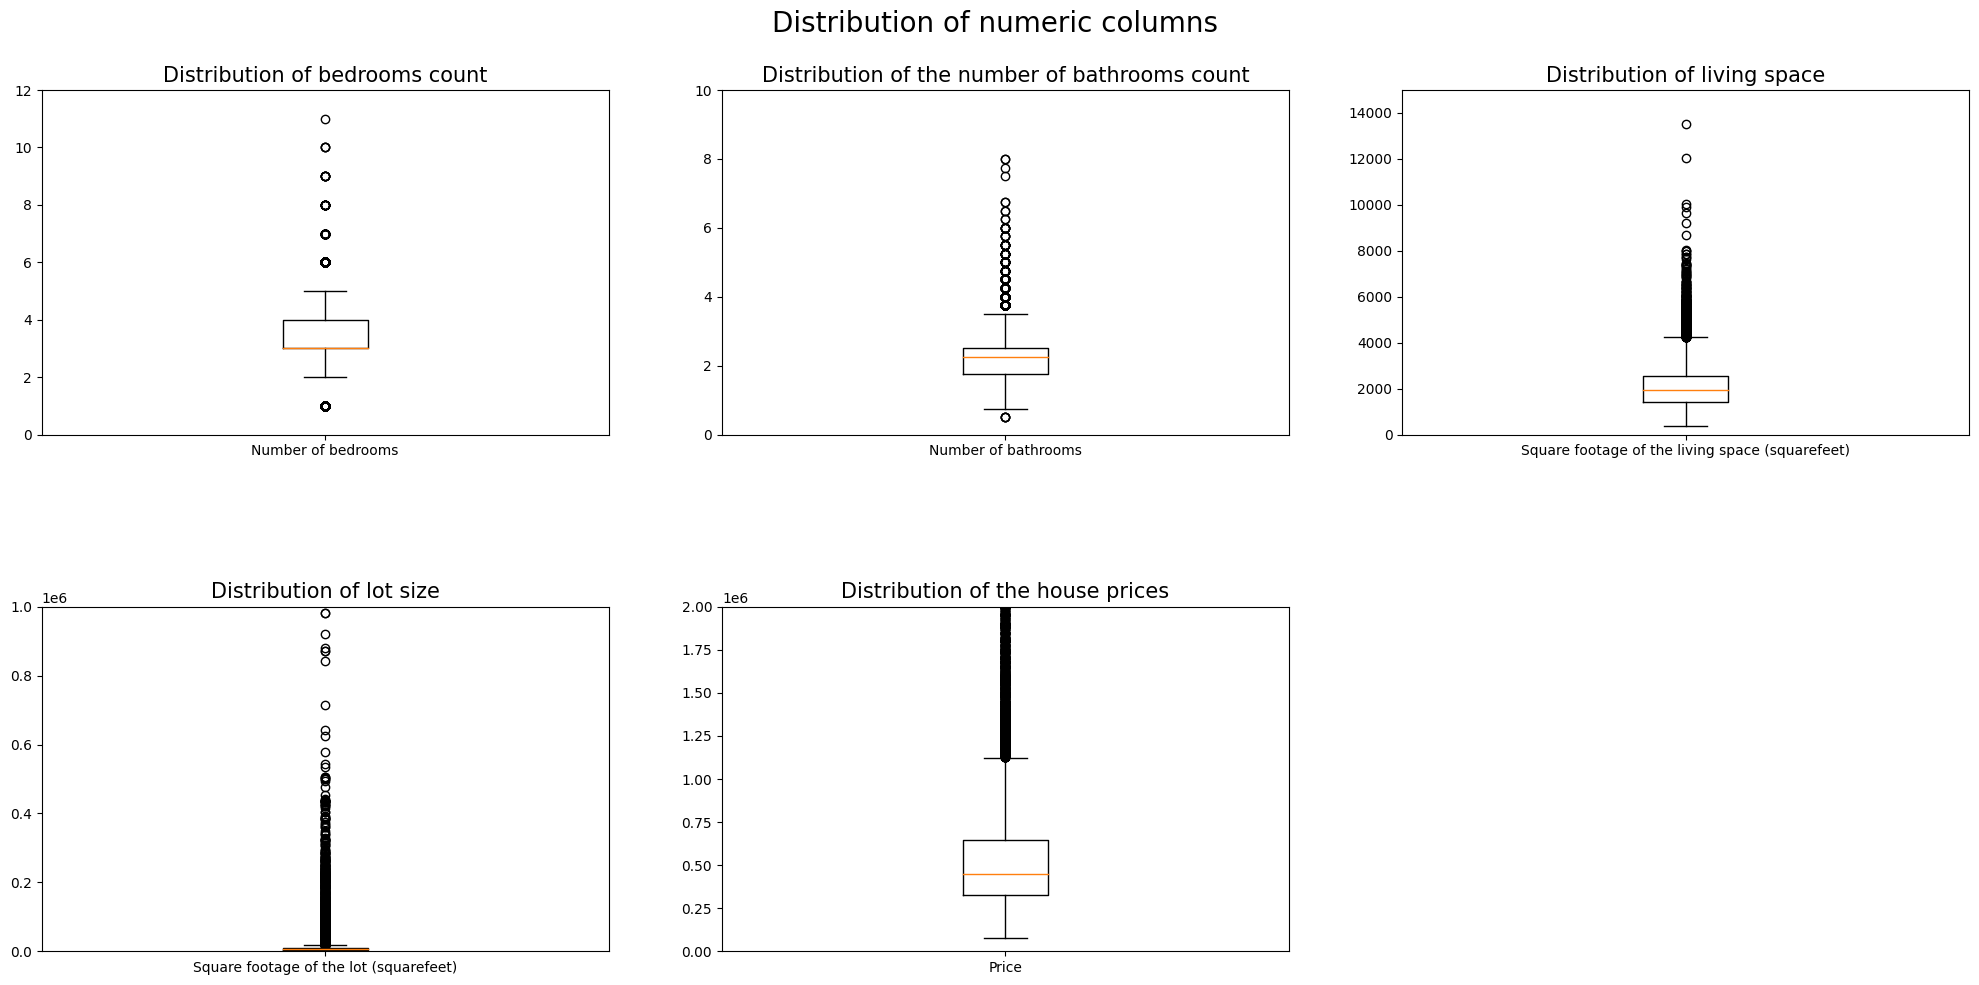

In [35]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 3 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df['bedrooms']) # creates boxplot
ax[0][0].set_xticklabels(labels=["Number of bedrooms"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,12) # limits the y-axis values from 0 to 12
ax[0][0].set_title("Distribution of bedrooms count", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df['bathrooms'])
ax[0][1].set_xticklabels(labels=["Number of bathrooms"])
ax[0][1].set_ylim(0,10)
ax[0][1].set_title("Distribution of the number of bathrooms count", fontsize = 15);

ax[0][2].boxplot(x = df['sqft_living'])
ax[0][2].set_xticklabels(labels=["Square footage of the living space (squarefeet)"])
ax[0][2].set_ylim(0,15000)
ax[0][2].set_title("Distribution of living space", fontsize = 15);

ax[1][0].boxplot(x = df['sqft_lot'])
ax[1][0].set_xticklabels(labels=["Square footage of the lot (squarefeet)"])
ax[1][0].set_ylim(0,1000000)
ax[1][0].set_title("Distribution of lot size", fontsize = 15);
                              
ax[1][1].boxplot(x = df['price'])
ax[1][1].set_xticklabels(labels=["Price"])
ax[1][1].set_ylim(0,2000000)
ax[1][1].set_title("Distribution of the house prices", fontsize = 15);

ax[1][2].boxplot(x = df['mile_dist_center'])
ax[1][2].set_xticklabels(labels=["Distance to the center of Seattle (miles)"])
ax[1][2].set_ylim(0,60)
ax[1][2].set_title("Distribution of the distances to the center of Seattle", fontsize = 15);

fig.delaxes(ax[1][2]);

Let's use histograms to analyze the distribution of the data.

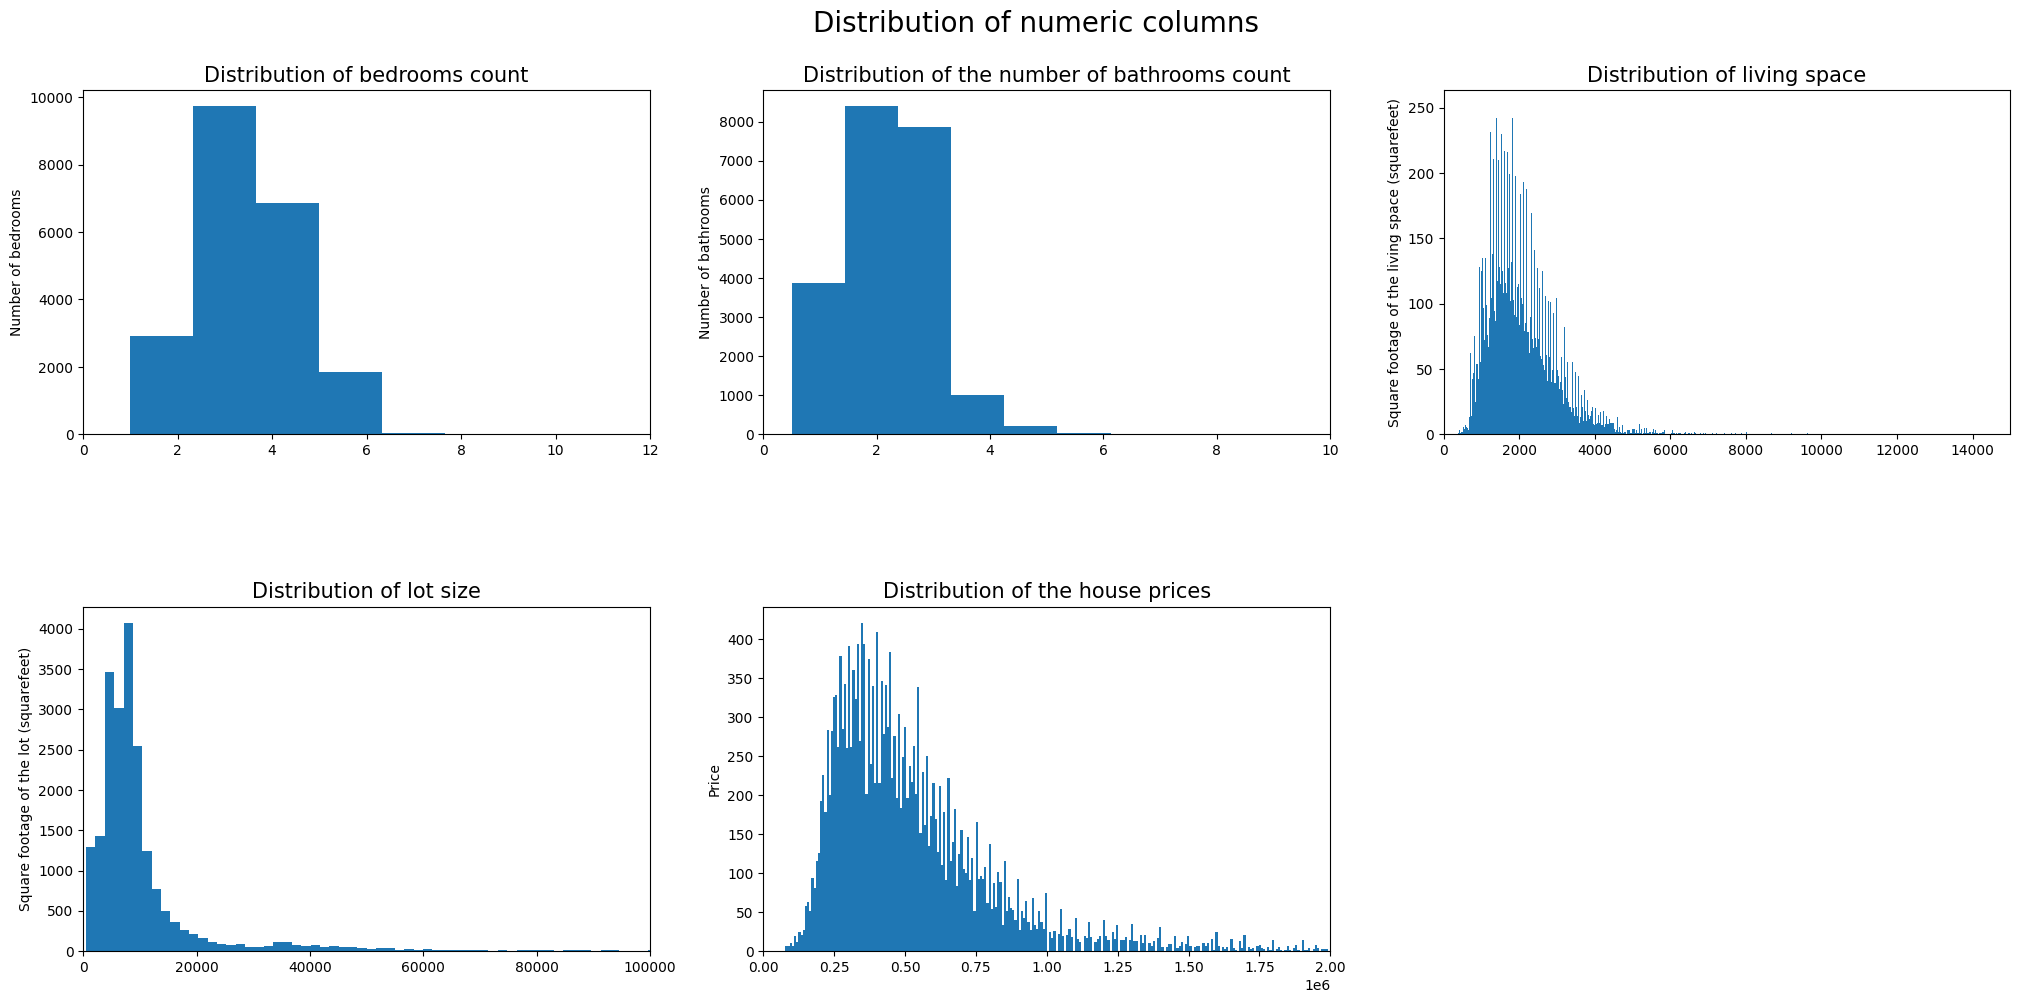

In [36]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 3 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x = df['bedrooms'], bins = 24) # creates histogram 
ax[0][0].set_ylabel("Number of bedrooms", fontsize = 10) # sets the label for the ticks on the x-axis
ax[0][0].set_xlim(0,12) # limits the y-axis values from 0 to 12
ax[0][0].set_title("Distribution of bedrooms count", fontsize = 15); # sets title for subplot

ax[0][1].hist(x = df['bathrooms'], bins = 8)
ax[0][1].set_ylabel("Number of bathrooms", fontsize = 10)
ax[0][1].set_xlim(0,10)
ax[0][1].set_title("Distribution of the number of bathrooms count", fontsize = 15);

ax[0][2].hist(x = df['sqft_living'], bins = 1000)
ax[0][2].set_ylabel("Square footage of the living space (squarefeet)", fontsize = 10)
ax[0][2].set_xlim(0,15000)
ax[0][2].set_title("Distribution of living space", fontsize = 15);

ax[1][0].hist(x = df['sqft_lot'], bins = 1000)
ax[1][0].set_ylabel("Square footage of the lot (squarefeet)", fontsize = 10)
ax[1][0].set_xlim(0,100000)
ax[1][0].set_title("Distribution of lot size", fontsize = 15);
                              
ax[1][1].hist(x = df['price'], bins = 1000)
ax[1][1].set_ylabel("Price", fontsize = 10)
ax[1][1].set_xlim(0,2000000)
ax[1][1].set_title("Distribution of the house prices", fontsize = 15);

ax[1][2].hist(x = df['yrs_age_sold'], bins = 50)
ax[1][2].set_ylabel("Age of the houses", fontsize = 10)
ax[1][2].set_xlim(0,150)
ax[1][2].set_title("Distribution of the age of the houses", fontsize = 15);

fig.delaxes(ax[1][2]);

### Relationships in the Data

**Relationships for all houses**

In [37]:
# correlation matrix between these variables
corr_columns=['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
              'sqft_lot', 'yr_built', 'date', 'mile_dist_center', 'yrs_age_sold',
              'view', 'grade', 'condition','price_per_sqft'
              ]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

price  bedrooms  bathrooms  floors  sqft_living  sqft_lot  \
price             1.000     0.310      0.525   0.255        0.701     0.089   
bedrooms          0.310     1.000      0.515   0.178        0.579     0.032   
bathrooms         0.525     0.515      1.000   0.502        0.756     0.088   
floors            0.255     0.178      0.502   1.000        0.353    -0.006   
sqft_living       0.701     0.579      0.756   0.353        1.000     0.173   
sqft_lot          0.089     0.032      0.088  -0.006        0.173     1.000   
yr_built          0.051     0.155      0.506   0.489        0.317     0.052   
date             -0.006    -0.017     -0.036  -0.024       -0.035     0.006   
mile_dist_center -0.287     0.058      0.083   0.003        0.074     0.243   
yrs_age_sold     -0.051    -0.155     -0.507  -0.489       -0.317    -0.052   
view              0.395     0.079      0.185   0.027        0.282     0.076   
grade             0.667     0.358      0.666   0.458        0.762     0.114   
condition         0.034     0.026     -0.129  -0.267       -0.062    -0.009   
price_per_sqft    0.554    -0.207     -0.094   0.002       -0.095    -0.036   

                  yr_built   date  mile_dist_center  yrs_age_sold   view  \
price                0.051 -0.006            -0.287        -0.051  0.395   
bedrooms             0.155 -0.017             0.058        -0.155  0.079   
bathrooms            0.506 -0.036             0.083        -0.507  0.185   
floors               0.489 -0.024             0.003        -0.489  0.027   
sqft_living          0.317 -0.035             0.074        -0.317  0.282   
sqft_lot             0.052  0.006             0.243        -0.052  0.076   
yr_built             1.000 -0.002             0.388        -1.000 -0.056   
date                -0.002  1.000             0.018         0.015 -0.002   
mile_dist_center     0.388  0.018             1.000        -0.388 -0.075   
yrs_age_sold        -1.000  0.015            -0.388         1.000  0.056   
view                -0.056 -0.002            -0.075         0.056  1.000   
grade                0.446 -0.041             0.005        -0.447  0.248   
condition           -0.365 -0.052            -0.074         0.364  0.045   
price_per_sqft      -0.295  0.036            -0.551         0.295  0.221   

                  grade  condition  price_per_sqft  
price             0.667      0.034           0.554  
bedrooms          0.358      0.026          -0.207  
bathrooms         0.666     -0.129          -0.094  
floors            0.458     -0.267           0.002  
sqft_living       0.762     -0.062          -0.095  
sqft_lot          0.114     -0.009          -0.036  
yr_built          0.446     -0.365          -0.295  
date             -0.041     -0.052           0.036  
mile_dist_center  0.005     -0.074          -0.551  
yrs_age_sold     -0.447      0.364           0.295  
view              0.248      0.045           0.221  
grade             1.000     -0.151           0.121  
condition        -0.151      1.000           0.102  
price_per_sqft    0.121      0.102           1.000

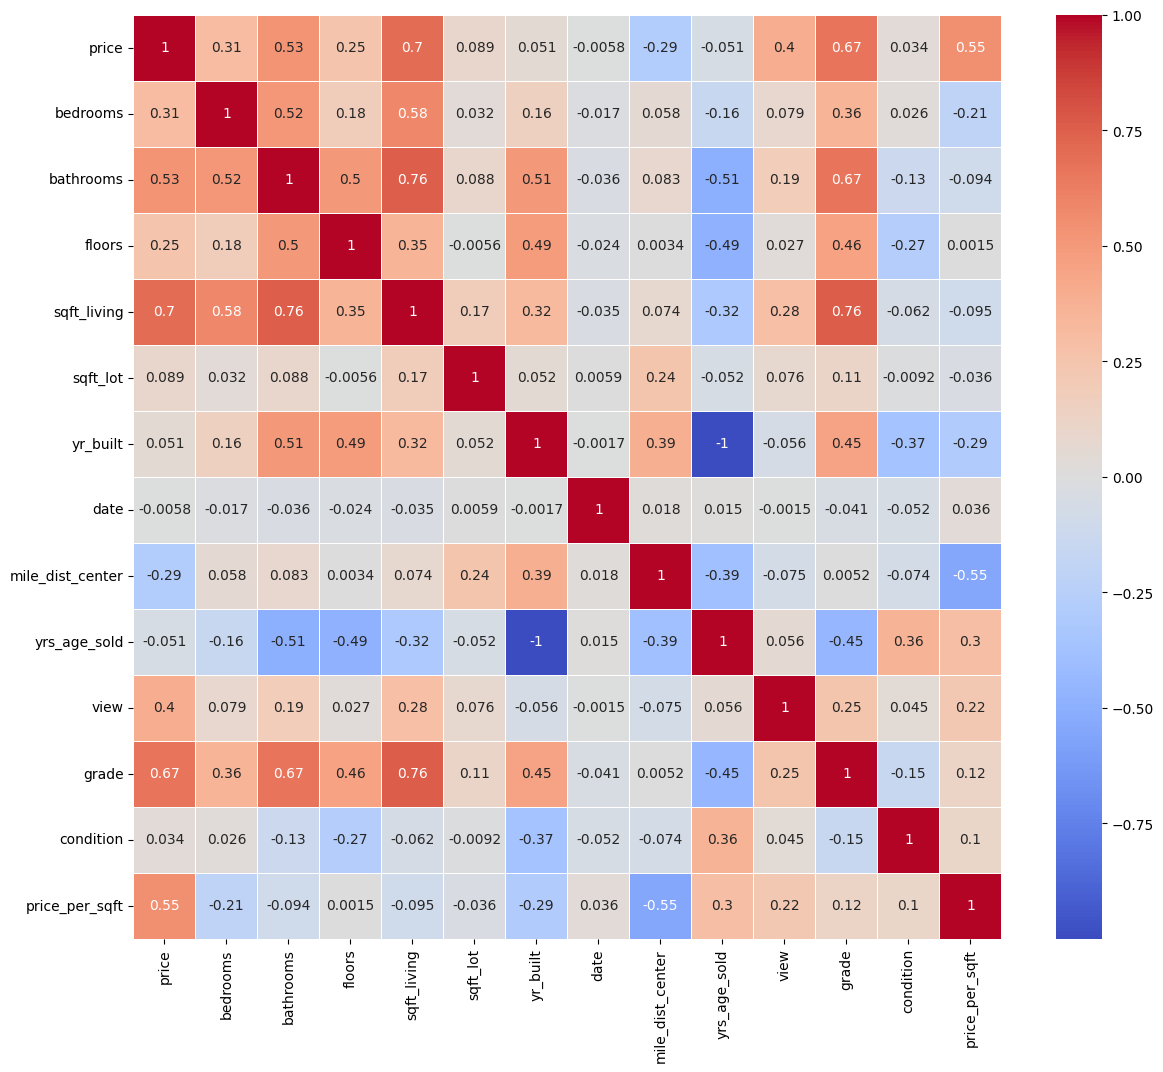

In [38]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

**Relationships for the City Houses**

In [39]:
# Filter the DataFrame to include only city houses
city_houses = df[df['location_type'] == 'city']

# Select the relevant columns for the correlation matrix
corr_columns = [
    'price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
    'sqft_lot', 'yr_built', 'date', 'mile_dist_center', 'yrs_age_sold',
    'view', 'grade', 'condition', 'price_per_sqft'
]

# Ensure 'date' column is handled correctly if it's a datetime type:
# Convert 'date' to a numerical value if necessary, e.g., the year of the date
if 'date' in corr_columns and pd.api.types.is_datetime64_any_dtype(city_houses['date']):
    city_houses['date'] = city_houses['date'].dt.year

# Compute the correlation matrix
corr_mtrx_city = city_houses[corr_columns].corr()

# Display the correlation matrix
print(corr_mtrx_city)

                  price  bedrooms  bathrooms  floors  sqft_living  sqft_lot  \
price             1.000     0.333      0.508   0.237        0.747     0.239   
bedrooms          0.333     1.000      0.480   0.116        0.591     0.165   
bathrooms         0.508     0.480      1.000   0.479        0.684     0.017   
floors            0.237     0.116      0.479   1.000        0.223    -0.302   
sqft_living       0.747     0.591      0.684   0.223        1.000     0.318   
sqft_lot          0.239     0.165      0.017  -0.302        0.318     1.000   
yr_built         -0.067    -0.009      0.396   0.508        0.051    -0.185   
date              0.006    -0.009     -0.044  -0.027       -0.041     0.016   
mile_dist_center -0.271     0.005     -0.138  -0.247       -0.066     0.390   
yrs_age_sold      0.068     0.009     -0.396  -0.509       -0.051     0.185   
view              0.414     0.116      0.217   0.030        0.364     0.282   
grade             0.693     0.299      0.615   0.479

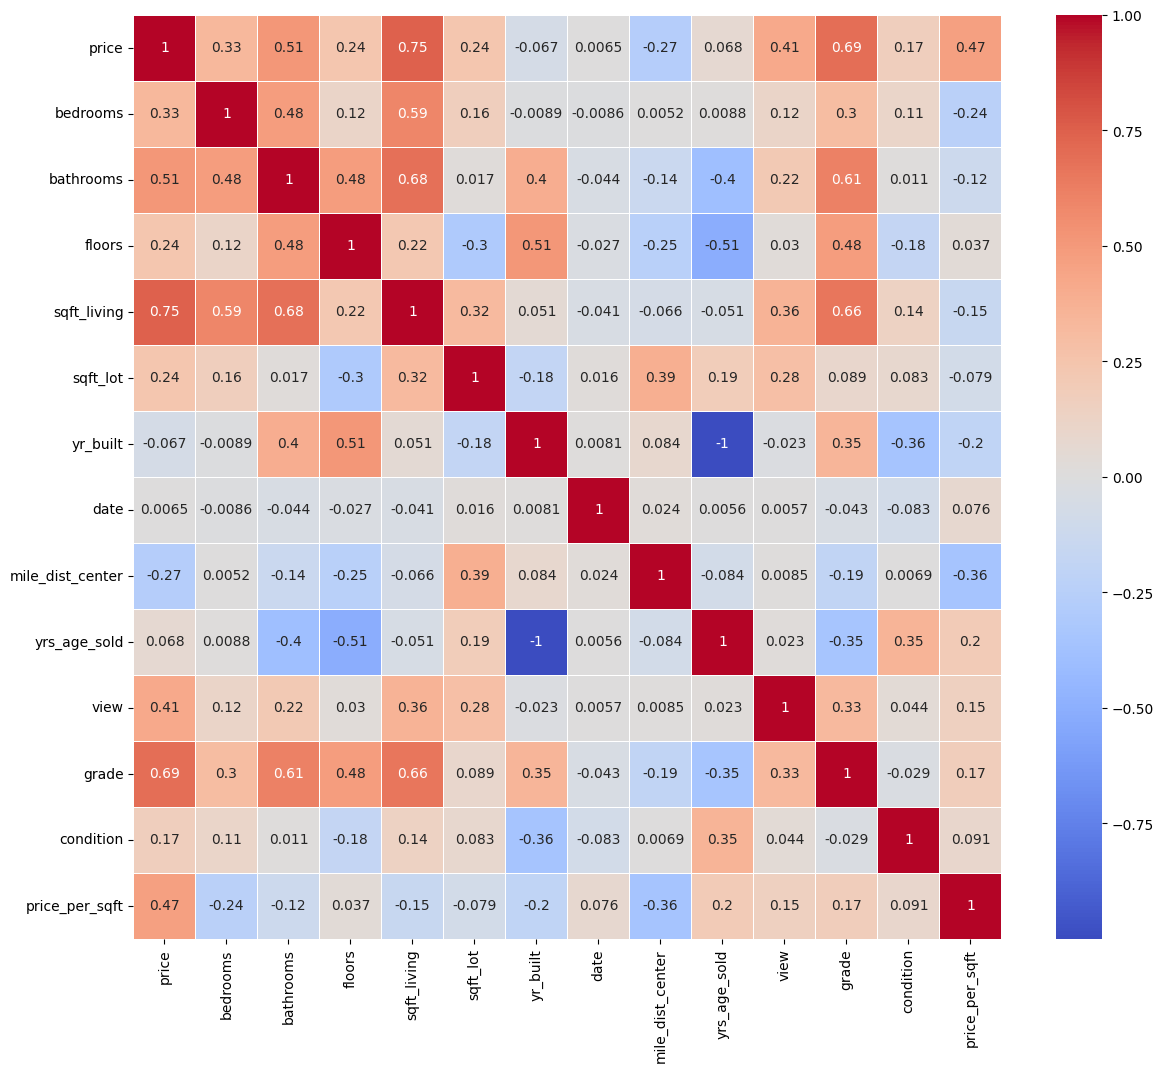

In [40]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx_city, linewidths=.5, annot=True, cmap='coolwarm')

**Relationships for the Countryside Houses**

In [41]:
# Filter the DataFrame to include only countryside houses
countryside_houses = df[df['location_type'] == 'countryside']

# Select the relevant columns for the correlation matrix
corr_columns = [
    'price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living',
    'sqft_lot', 'yr_built', 'date', 'mile_dist_center', 'yrs_age_sold',
    'view', 'grade', 'condition', 'price_per_sqft'
]

# Ensure 'date' column is handled correctly if it's a datetime type:
# Convert 'date' to a numerical value if necessary, e.g., the year of the date
if 'date' in corr_columns and pd.api.types.is_datetime64_any_dtype(countryside_houses['date']):
    countryside_houses['date'] = countryside_houses['date'].dt.year

# Compute the correlation matrix
corr_mtrx_countryside = countryside_houses[corr_columns].corr()

# Display the correlation matrix
print(corr_mtrx_countryside)

                  price  bedrooms  bathrooms  floors  sqft_living  sqft_lot  \
price             1.000     0.327      0.570   0.269        0.729     0.112   
bedrooms          0.327     1.000      0.517   0.241        0.564    -0.005   
bathrooms         0.570     0.517      1.000   0.541        0.783     0.074   
floors            0.269     0.241      0.541   1.000        0.454     0.013   
sqft_living       0.729     0.564      0.783   0.454        1.000     0.154   
sqft_lot          0.112    -0.005      0.074   0.013        0.154     1.000   
yr_built          0.208     0.202      0.574   0.601        0.416    -0.020   
date             -0.001    -0.014     -0.022  -0.022       -0.029     0.005   
mile_dist_center -0.373    -0.121     -0.052   0.095       -0.123     0.179   
yrs_age_sold     -0.208    -0.202     -0.574  -0.601       -0.417     0.020   
view              0.385     0.072      0.191   0.023        0.279     0.103   
grade             0.686     0.374      0.682   0.474

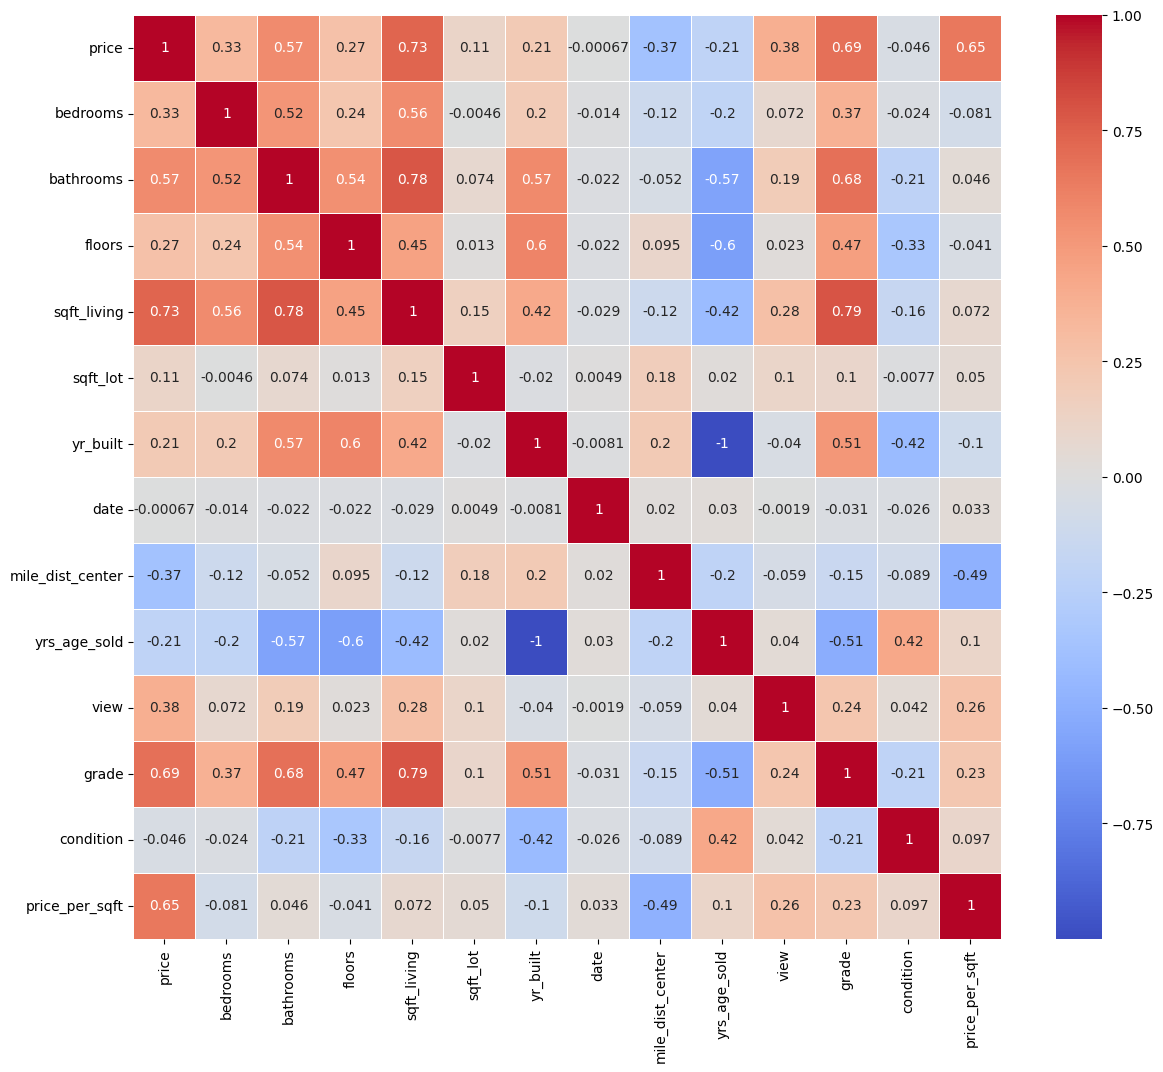

In [42]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx_countryside, linewidths=.5, annot=True, cmap='coolwarm')

## Addressing the Business Case

The dataset has been reviewed and confirmed to contain valid and plausible data. We will now proceed with testing the hypotheses.

### Mapping All Datapoints on the Map of Seattle

In [73]:
# Creating the plot with OpenStreetMap
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='long',
    hover_name='id',  # Assuming you have an 'address' column for house addresses
    color_discrete_sequence=['#E5989B'],  # Point color for houses
    size_max=15,  # Max size of points, adjust as needed
    zoom=8.55,  # Zoom level to focus on Seattle
    center={"lat": 47.45, "lon": -122.10},  # Centers the map
    title='Houses in and around Seattle',
    mapbox_style="open-street-map"  # Use OpenStreetMap style
)

# Adjusting the size of the plot
fig.update_layout(width=1000, height=700)  # Set the width and height as desired

fig.show()


### Visualizing City and Countryside Houses Alongside Seattle's Center on a Unified Map Based on Our Analysis

In [69]:
# Assuming df is your DataFrame and now includes a 'location_type' column with values 'city' or 'countryside'

# Modify the plotting code to color points based on the 'location_type' column
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='long',
    hover_name='id',  # Assuming the 'id' column is for house IDs or addresses
    color='location_type',  # Use the 'location_type' column for coloring
    color_discrete_map={'city': '#B5838D', 'countryside': '#6D6875'},  # Assign custom colors
    size_max=15,
    zoom=8.55,  # Adjust the zoom level as needed
    center={"lat": 47.45, "lon": -122.10},  # Centers the map
    title='Houses in and around Seattle',
    mapbox_style="open-street-map"
)

# Coordinates for the center of Seattle
seattle_center = {"lat": 47.6062, "lon": -122.3321}

# Adding a point for the center of Seattle using Graph Objects
fig.add_trace(go.Scattermapbox(
    lat=[seattle_center['lat']],
    lon=[seattle_center['lon']],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color='black',  # Color of the center point
        opacity=1
    ),
    text=['Center of Seattle'],  # Text to display on hover
))

# Adjust the size of the plot as before
fig.update_layout(width=1000, height=700)

# Display the plot
fig.show()


### Location Hypothesis

1. Comparative Location Analysis
    First, let's compare basic metrics like average price and average size between city and countryside houses.

    - price: The price of the house.
    - sqft_living: Square footage of the home.
    - location_type: A categorical variable indicating 'city' or 'countryside'.

In [100]:
# Grouping by location type and calculating mean and std for price and square footage
grouped_metrics = df.groupby('location_type').agg({
    'price': ['mean', 'std'],
    'sqft_living': ['mean', 'std']
}).reset_index()

# Simplifying column names
grouped_metrics.columns = ['location_type', 'price_mean', 'price_std', 'sqft_living_mean', 'sqft_living_std']

# Creating subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=("Average Price ($)", "Average Sqft of Living (squarefeet)"))

# Adding the average price bar chart to the first subplot with error bars for standard deviation
fig.add_trace(
    go.Bar(
        name='Price',
        x=grouped_metrics['location_type'],
        y=grouped_metrics['price_mean'],
        error_y=dict(type='data', array=grouped_metrics['price_std'], visible=True),
        marker_color=['#B5838D', '#6D6875']
    ),
    row=1, col=1
)

# Adding the average sqft living bar chart to the second subplot with error bars for standard deviation
fig.add_trace(
    go.Bar(
        name='Sqft Living',
        x=grouped_metrics['location_type'],
        y=grouped_metrics['sqft_living_mean'],
        error_y=dict(type='data', array=grouped_metrics['sqft_living_std'], visible=True),
        marker_color=['#B5838D', '#6D6875']
    ),
    row=1, col=2
)

# Update layout (optional adjustments)
fig.update_layout(
    title_text='Comparative Location Analysis: City vs. Countryside with Std Dev',
    barmode='group',
    height=400,  # Adjust the height of the figure if necessary
    width=800   # Adjust the width of the figure if necessary
)

# Show the figure
fig.show()

The hypothesis appears to be incorrect. Within one standard deviation, the prices are comparable, and the living spaces are also similar, suggesting that larger houses in the countryside do not create a balancing effect. However, to further explore this, let's examine the average price per square foot.

In [104]:
# Prepare data for box plot
city_data = df[df['location_type'] == 'city']['price_per_sqft']
countryside_data = df[df['location_type'] == 'countryside']['price_per_sqft']

# Creating subplots: 1 row, 2 columns for box plots of price per sqft for city and countryside
fig = make_subplots(rows=1, cols=2, subplot_titles=("Price per Sqft: City", "Price per Sqft: Countryside"))

# Adding city data to the first subplot
fig.add_trace(
    go.Box(y=city_data, name='City', marker_color='#B5838D'),
    row=1, col=1
)

# Adding countryside data to the second subplot
fig.add_trace(
    go.Box(y=countryside_data, name='Countryside', marker_color='#6D6875'),
    row=1, col=2
)

# Manually setting y-axis range for each subplot and moving y-axis labels further
fig.update_yaxes(title_text='Price per Sqft ($)', range=[0, 900], row=1, col=1, title_standoff=5)
fig.update_yaxes(title_text='Price per Sqft ($)', range=[0, 900], row=1, col=2, title_standoff=5)

# Update layout (optional adjustments)
fig.update_layout(
    title_text='Comparative Location Analysis: Price per Sqft by Location Type',
    height=400,  # Adjust the height of the figure if necessary
    width=800,   # Adjust the width of the figure if necessary
    yaxis_automargin=True, # Automatically adjust margin to fit y-axis labels
)

# Show the figure
fig.show()

The average price appears to be lower in the countryside, yet the substantial standard deviation suggests that the prices are relatively comparable.

Let's take a look from another angle.

2. Proximity Evaluation for City Houses

    Now, let's analyze the price gradient relative to the distance from key city center landmarks

In [77]:
# Create bins for distances
bins = np.linspace(0, 20, 21)  # Creating 20 bins for the range 0-20 miles
df['distance_bin'] = pd.cut(df['mile_dist_center'], bins, labels=bins[:-1].astype(str))

# Calculate the mean price for each bin and location type
binned_prices = df.groupby(['distance_bin', 'location_type'])['price'].mean().reset_index()

# Plotting
fig = px.bar(
    binned_prices,
    x='distance_bin',
    y='price',
    color='location_type',  # Differentiate bars by location type
    barmode='group',
    title='Average House Price vs. Distance from City Center',
    labels={'distance_bin': 'Distance from City Center (miles)', 'price': 'Average Price ($)'},
    color_discrete_map={'city': '#B5838D', 'countryside': '#6D6875'}  # Custom colors
)

# Adjust the layout if needed
fig.update_layout(xaxis_title='Distance from City Center (miles)',
                  yaxis_title='Average Price ($)',
                  xaxis={'categoryorder':'array', 'categoryarray':bins[:-1].astype(str)})

fig.show()

There appears to be a middle range where countryside house prices significantly exceed those in the city. This could be attributed to desirable suburbs near the city center. However, the presence of larger lots might be influencing this trend. Let’s revisit the average price per square foot to explore this further.

In [78]:
# Calculate the mean price per sqft for each bin and location type
binned_price_per_sqft = df.groupby(['distance_bin', 'location_type'])['price_per_sqft'].mean().reset_index()

# Plotting
fig = px.bar(
    binned_price_per_sqft,
    x='distance_bin',
    y='price_per_sqft',
    color='location_type',  # Differentiate bars by location type
    barmode='group',
    title='Average Price per Sqft vs. Distance from City Center',
    labels={'distance_bin': 'Distance from City Center (miles)', 'price_per_sqft': 'Average Price per Sqft ($)'},
    color_discrete_map={'city': '#B5838D', 'countryside': '#6D6875'}  # Custom colors
)

# Adjust the layout if needed
fig.update_layout(xaxis_title='Distance from City Center (miles)',
                  yaxis_title='Average Price per Sqft ($)',
                  xaxis={'categoryorder': 'array', 'categoryarray': bins[:-1].astype(str)})

fig.show()

Within the 0-3 mile range in the city, prices are indeed slightly higher than those located 8 or more miles from the city center. Interestingly, there's an intermediate range where properties combine the appeal of countryside living with proximity to the city center, resulting in the highest house prices.

Let's create a Plotly scatter mapbox plot that includes only houses that are either city houses within 3 miles of the center or countryside houses that are more than 8 miles away from the center:

In [115]:
# Update the filter to include city houses within 8 miles and countryside houses beyond 8 miles
filtered_df = df[
    ((df['location_type'] == 'city') & (df['mile_dist_center'] < 3)) |
    ((df['location_type'] == 'countryside') & (df['mile_dist_center'] > 8))
]

# Exclude houses between 3 and 8 miles
filtered_df = filtered_df[~((df['mile_dist_center'] > 3) & (df['mile_dist_center'] < 8))]

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    filtered_df,
    lat='lat',
    lon='long',
    hover_name='id',  # Assuming 'id' for house IDs or addresses
    color='location_type',  # Use the 'location_type' column for coloring
    color_discrete_map={'city': '#B5838D', 'countryside': '#6D6875'},  # Custom colors
    size_max=15,
    zoom=8.55,  # Adjust zoom level as needed
    center={"lat": 47.45, "lon": -122.10},  # Centers the map around a specific area
    title='City and Countryside Houses: Selective Distance Criteria',
    mapbox_style="open-street-map"
)

# Coordinates for the center of Seattle, adding as an additional point
seattle_center = {"lat": 47.6062, "lon": -122.3321}

# Adding a point for the center of Seattle using Graph Objects
fig.add_trace(go.Scattermapbox(
    lat=[seattle_center['lat']],
    lon=[seattle_center['lon']],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=10,
        color='black',  # Color for the center point
        opacity=1
    ),
    text=['Center of Seattle'],  # Hover text
))

# Adjust the size of the plot
fig.update_layout(width=1000, height=700)

# Display the plot
fig.show()



As for the validity of our hypothesis, it appears to be situational. Given that our client prefers a house close to the city, it seems he might actually favor a countryside home located 8 miles or more from the city. For him, this hypothesis holds true.

### Size Hypothesis

To analyze the "Size Hypothesis" which suggests that houses with fewer bedrooms (1-2) and bathrooms are more cost-effective for a two-person household, and to understand the impact of these factors along with square footage on the market value, we can create plots for each indicator. These will include:

a) Number of Bedrooms vs. Price: To observe how the market value correlates with the number of bedrooms, suitable for a two-person household.

b) Number of Bathrooms vs. Price: To refine the analysis based on the number of bathrooms, addressing common needs for a two-person household.

c) Square Footage of the Home vs. Price: To assess the impact of living space on comfort and suitability, and its relation to market value.

For this analysis, we'll use Plotly for visualization to create scatter plots, which are suitable for observing correlations and trends.

In [84]:
# Creating subplots: 3 rows, 1 column
fig = make_subplots(rows=3, cols=1, subplot_titles=("Price vs. Number of Bedrooms", 
                                                     "Price vs. Number of Bathrooms", 
                                                     "Price vs. Square Footage"))

# Adding scatter plot for Number of Bedrooms vs. Price
fig.add_trace(
    go.Scatter(x=df['bedrooms'], y=df['price'], mode='markers', name='Bedrooms', marker_color='#E5989B'),
    row=1, col=1
)

# Adding scatter plot for Number of Bathrooms vs. Price
fig.add_trace(
    go.Scatter(x=df['bathrooms'], y=df['price'], mode='markers', name='Bathrooms', marker_color='#E5989B'),
    row=2, col=1
)

# Adding scatter plot for Square Footage vs. Price
fig.add_trace(
    go.Scatter(x=df['sqft_living'], y=df['price'], mode='markers', name='Sqft Living', marker_color='#E5989B'),
    row=3, col=1
)

# Update layout (optional adjustments)
fig.update_layout(height=1200, width=600, title_text="Size Hypothesis Analysis")
fig.update_xaxes(title_text="Bedrooms", row=1, col=1)
fig.update_xaxes(title_text="Bathrooms", row=2, col=1)
fig.update_xaxes(title_text="Squarefootage of Living Space (squaremiles)", row=3, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Price ($)", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=3, col=1)

# Show the figure
fig.show()

Since the x-axis in the two upper panels is categorical, we've included additional bar plots for clearer visualization of these cases.

In [85]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Calculating the average price for each number of bedrooms and bathrooms
avg_price_per_bedroom = df.groupby('bedrooms')['price'].mean().reset_index()
avg_price_per_bathroom = df.groupby('bathrooms')['price'].mean().reset_index()

# Creating subplots: 2 rows, 1 column for Bedrooms and Bathrooms analysis
fig = make_subplots(rows=2, cols=1, subplot_titles=("Average Price vs. Number of Bedrooms", 
                                                     "Average Price vs. Number of Bathrooms"))

# Adding bar plot for Average Price vs. Number of Bedrooms
fig.add_trace(
    go.Bar(x=avg_price_per_bedroom['bedrooms'], y=avg_price_per_bedroom['price'], name='Bedrooms', marker_color='#E5989B'),
    row=1, col=1
)

# Adding bar plot for Average Price vs. Number of Bathrooms
fig.add_trace(
    go.Bar(x=avg_price_per_bathroom['bathrooms'], y=avg_price_per_bathroom['price'], name='Bathrooms', marker_color='#E5989B'),
    row=2, col=1
)

# Update layout (optional adjustments)
fig.update_layout(height=800, width=600, title_text="Size Hypothesis Analysis: Bedrooms & Bathrooms")
fig.update_xaxes(title_text="Number of Bedrooms", row=1, col=1)
fig.update_xaxes(title_text="Number of Bathrooms", type='category', row=2, col=1)  # Setting type as category for better display
fig.update_yaxes(title_text="Average Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Average Price ($)", row=2, col=1)

# Show the figure
fig.show()


Analysis Notes:

- Average Price vs. Number of Bedrooms: This bar plot visualizes the average price for homes with different numbers of bedrooms, highlighting cost-effectiveness trends for smaller homes suitable for a two-person household.<br>
- Average Price vs. Number of Bathrooms: Similarly, this plot examines the average price across different numbers of bathrooms, further refining the suitability analysis for two-person households.<br>
This method offers a direct comparison of market values in relation to the number of bedrooms and bathrooms, affirming the "Size Hypothesis" particularly for properties with 1-2 bedrooms, which are our primary focus.

### Condition Hypothesis


To analyze the "Condition Hypothesis" which suggests that newer and better-maintained houses command higher prices than older and less well-maintained ones, we can proceed with an analysis and visualization strategy for each indicator mentioned. This involves:

1. Age of the House: Calculating the actual age at the time of sale.
2. Condition of the House: Evaluating its impact on price.
3. Year Renovated: Creating a binary indicator for renovation and analyzing its impact.
4. Grade: Assessing the quality proxy's effect on price.
Here's a structured approach to tackle this analysis with Python and Plotly for visual representation:

In [51]:
df.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  7129300520         3      1.000         1180      5650   1.000        <NA>   
1  6414100192         3      2.250         2570      7242   2.000       False   
2  5631500400         2      1.000          770     10000   1.000       False   
3  2487200875         4      3.000         1960      5000   1.000       False   
4  1954400510         3      2.000         1680      8080   1.000       False   

   view  condition  grade  ...       date   price  view_cat mile_dist_center  \
0 0.000          3      7  ... 2014-10-13  221900   No View            7.444   
1 0.000          3      7  ... 2014-12-09  538000   No View            7.955   
2 0.000          3      6  ... 2015-02-25  180000   No View           10.206   
3 0.000          5      7  ... 2014-12-09  604000   No View            6.551   
4 0.000          3      8  ... 2015-02-18  510000   No View           13.432   

   yrs_age_sold  renovation_status  yrs_since_renovation  price_per_sqft  \
0            59        unrenovated                  <NA>         188.051   
1            63          renovated                    23         209.339   
2            82        unrenovated                  <NA>         233.766   
3            49        unrenovated                  <NA>         308.163   
4            28        unrenovated                  <NA>         303.571   

   location_type distance_bin  
0           city          7.0  
1           city          7.0  
2    countryside         10.0  
3           city          6.0  
4    countryside         13.0  

[5 rows x 29 columns]

In [82]:
# a) Age of th House vs. Prize

# Calculating the average price for each age at sale
avg_price_by_age = df.groupby('yrs_age_sold')['price'].mean().reset_index()

# Sorting by age at sale for ordered plotting
avg_price_by_age_sorted = avg_price_by_age.sort_values(by='yrs_age_sold')

# Creating the bar plot
fig = px.bar(avg_price_by_age_sorted, 
             x='yrs_age_sold', 
             y='price',
             labels={'yrs_age_sold': 'Age at Sale', 'price': 'Average Price'},
             title='Average Sale Price vs. Age at Sale',
             color_discrete_sequence=['#E5989B'])

fig.show()


In [83]:
# b) Condition of the House vs. Price

# Define the mapping from numeric condition to descriptive labels
condition_mapping = {
    1: "Poor",
    2: "Fair",
    3: "Average",
    4: "Good",
    5: "Excellent"
}

# Map the condition numbers to descriptive labels
df['condition_label'] = df['condition'].map(condition_mapping)

# Convert 'condition_label' to a categorical type with a specified order
condition_order = ["Poor", "Fair", "Average", "Good", "Excellent"]
df['condition_label'] = pd.Categorical(df['condition_label'], categories=condition_order, ordered=True)

# Calculate the average price for each condition label
avg_price_by_condition_label = df.groupby('condition_label')['price'].mean().reset_index()

# Creating the bar plot
fig = px.bar(avg_price_by_condition_label, 
             x='condition_label', 
             y='price',
             category_orders={'condition_label': condition_order},  # Ensure the custom order is used
             labels={'condition_label': 'Condition', 'price': 'Average Price ($)'},
             title='Average Sale Price vs. Condition',
             color_discrete_sequence=['#E5989B'])

fig.show()

In [99]:
#c) Impact of Renovation
# Visualize price distribution for renovated vs. non-renovated houses.
ig = go.Figure()

# Adding traces for renovated and unrenovated houses
fig.add_trace(go.Box(
    y=df[df['renovation_status'] == 'renovated']['price'],
    name='Renovated',
    line=dict(color='#FFCDB2')  # Setting the color of the box outline
))

fig.add_trace(go.Box(
    y=df[df['renovation_status'] == 'unrenovated']['price'],
    name='Not Renovated',
    line=dict(color='#FFB4A2')  # Setting the color of the box outline
))

# Update layout with title, manually set y-axis range, and y-axis label
fig.update_layout(
    title='Price Distribution: Renovated vs. Not Renovated',
    yaxis=dict(
        range=[0, 2000000],  # Manually setting the y-axis limits; adjust as needed
        title='Price ($)'  # Adding a y-axis label
    )
)

# Show the figure
fig.show()


In [86]:
# d) Grade of the House vs. Price

# Define the mapping from grade numbers to descriptive labels
grade_mapping = {
    3: "Very Poor",
    4: "Poor",
    5: "Below Average",
    6: "Fair",
    7: "Average",
    8: "Good",
    9: "Very Good",
    10: "Excellent",
    11: "Outstanding",
    12: "Superior",
    13: "Exceptional"
}

# Map the grade numbers to descriptive labels
df['grade_label'] = df['grade'].map(grade_mapping)

# Convert 'grade_label' to a categorical type with a specified order
grade_order = ["Very Poor", "Poor", "Below Average", "Fair", "Average", 
               "Good", "Very Good", "Excellent", "Outstanding", 
               "Superior", "Exceptional"]
df['grade_label'] = pd.Categorical(df['grade_label'], categories=grade_order, ordered=True)

# Calculate the average price for each grade label
avg_price_by_grade_label = df.groupby('grade_label')['price'].mean().reset_index()

# Creating the bar plot
fig = px.bar(avg_price_by_grade_label, 
             x='grade_label', 
             y='price',
             category_orders={'grade_label': grade_order},  # Ensure the custom order is used
             labels={'grade_label': 'Grade Category', 'price': 'Average Price ($)'},
             title='Average House Price by Grade Category',
             color_discrete_sequence=['#E5989B'])

fig.show()

Analysis Notes

- Age at Sale: Younger houses show no trend towards higher prices. Therefore, the actual impact needs to be viewed in conjunction with condition and renovations.
- Condition and Grade: Higher condition ratings and grades correlate with higher prices. These factors can serve as quality indicators.
- Renovation's Impact: Renovated houses could demonstrate higher prices, especially if the renovation is recent, underscoring the hypothesis that well-maintained (or updated) homes command higher prices.


This structured approach provides a comprehensive analysis of the factors influencing house prices, aligning with the "Condition Hypothesis".

### Optimal Timig Hypothesis

For analyzing the "Optimal Timing Hypothesis" and examining seasonal trends in house pricing and availability, particularly focusing on the 'date' column to identify patterns over different months or seasons, we can follow a step-by-step approach. This involves:

1. Extracting the month or season from the 'date' column.
2. Calculating average prices and availability by month or season.
3. Creating plots to visualize these trends


In [56]:
# Extract month
df['month'] = df['date'].dt.month

# Optional: Map months to seasons if you prefer a seasonal analysis
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # 9, 10, 11
        return 'Autumn'

df['season'] = df['month'].apply(month_to_season)

In [57]:
# Calculate average price per month/season
avg_price_per_month = df.groupby('month')['price'].mean().reset_index()

# Or, for seasonal analysis
avg_price_per_season = df.groupby('season')['price'].mean().reset_index()

In [89]:
# Plotting the average price per month
fig_month = px.bar(avg_price_per_month, x='month', y='price',
                   labels={'month': 'Month', 'price': 'Average Price ($)'},
                   title='Average House Price by Month',
                   color_discrete_sequence=['#E5989B'])

fig_month.show()

# Plotting the average price per season
fig_season = px.bar(avg_price_per_season, x='season', y='price',
                    labels={'season': 'Season', 'price': 'Average Price ($)'},
                    title='Average House Price by Season',
                    category_orders={"season": ["Winter", "Spring", "Summer", "Autumn"]},
                    color_discrete_sequence=['#E5989B'])

fig_season.show()

A trend is already apparent: purchasing during the winter appears optimal. Let's refine this analysis further by focusing exclusively on countryside properties.

In [59]:
# Filter for countryside houses
countryside_houses = df[df['location_type'] == 'countryside']

In [60]:
# Calculate average price per month for countryside houses
avg_price_per_month_countryside = countryside_houses.groupby('month')['price'].mean().reset_index()

# Optional: Calculate average price per season for countryside houses
avg_price_per_season_countryside = countryside_houses.groupby('season')['price'].mean().reset_index()

In [90]:
# Plotting the average price per month for countryside houses
fig_month_countryside = px.bar(avg_price_per_month_countryside, x='month', y='price',
                               labels={'month': 'Month', 'price': 'Average Price ($)'},
                               title='Average House Price by Month for Countryside Houses',
                               color_discrete_sequence=['#6D6875'])

fig_month_countryside.show()

Next, we'll narrow our focus to countryside houses with no more than two bedrooms.

To refine the analysis further for countryside houses with a maximum of 2 bedrooms, we'll filter the countryside houses data accordingly and then proceed with the seasonal trends analysis in pricing, similar to the previous steps.

In [91]:
# Filter for countryside houses with max 2 bedrooms
countryside_houses_2bed = countryside_houses[countryside_houses['bedrooms'] <= 2]

# Calculate average price per month for countryside houses with max 2 bedrooms
avg_price_per_month_2bed = countryside_houses_2bed.groupby('month')['price'].mean().reset_index()

# Optional: Calculate average price per season for countryside houses with max 2 bedrooms
avg_price_per_season_2bed = countryside_houses_2bed.groupby('season')['price'].mean().reset_index()

import plotly.express as px

# Plotting the average price per month for countryside houses with max 2 bedrooms
fig_month_2bed = px.bar(avg_price_per_month_2bed, x='month', y='price',
                        labels={'month': 'Month', 'price': 'Average Price ($)'},
                        title='Average House Price by Month for Countryside Houses with Max 2 Bedrooms',
                        color_discrete_sequence=['#6D6875'])

fig_month_2bed.show()


These steps further narrow down the analysis to specifically target countryside houses suitable for couples, defined here as having a maximum of 2 bedrooms. This refined analysis should help in identifying optimal buying times while considering the specific needs of smaller households in the countryside.

Let's now refine that even further to houses in only poor or fair condition:

To refine the analysis even further to focus on countryside houses with a maximum of 2 bedrooms and in "Poor" or "Fair" condition only, we'll apply additional filters based on the condition of the houses. Let's proceed with the filtering and then repeat the seasonal trends analysis on this more specific subset of houses.

In [92]:
# Filter for countryside houses with max 2 bedrooms and in Poor/Fair condition
countryside_houses_2bed_poor_fair = countryside_houses_2bed[countryside_houses_2bed['condition'].isin([1, 2])]

# Calculate average price per month for countryside houses with max 2 bedrooms
avg_price_per_month_2bed = countryside_houses_2bed.groupby('month')['price'].mean().reset_index()

# Optional: Calculate average price per season for countryside houses with max 2 bedrooms
avg_price_per_season_2bed = countryside_houses_2bed.groupby('season')['price'].mean().reset_index()

import plotly.express as px

# Plotting the average price per month for countryside houses with max 2 bedrooms
fig_month_2bed = px.bar(avg_price_per_month_2bed, x='month', y='price',
                        labels={'month': 'Month', 'price': 'Average Price ($)'},
                        title='Average House Price by Month for Countryside Houses with Max 2 Bedrooms',
                        color_discrete_sequence=['#6D6875'])

fig_month_2bed.show()


Finally, we will further refine our analysis by focusing on countryside houses that are located at least 8 miles away from the city center.

To refine the analysis further to include only those countryside houses with a maximum of 2 bedrooms, in "Poor" or "Fair" condition, and located at least 8 miles away from the city center, we'll apply an additional distance filter. After filtering, we'll proceed with the analysis of seasonal trends in house pricing for this specific subset.

In [94]:
# Further filtering for houses at least 8 miles away from the city center
countryside_houses_final_subset = countryside_houses_2bed_poor_fair[countryside_houses_2bed_poor_fair['mile_dist_center'] >= 8]

# Calculate average price per month for the final subset
avg_price_per_month_final_subset = countryside_houses_final_subset.groupby('month')['price'].mean().reset_index()

# Optional: Calculate average price per season for the final subset
avg_price_per_season_final_subset = countryside_houses_final_subset.groupby('season')['price'].mean().reset_index()

# Plotting the average price per month for the final subset
fig_month_final_subset = px.bar(avg_price_per_month_final_subset, x='month', y='price',
                                labels={'month': 'Month', 'price': 'Average Price ($)'},
                                title='Average House Price by Month for Countryside Houses with Specific Criteria',
                                color_discrete_sequence=['#6D6875'])

fig_month_final_subset.show()

# Plotting the average price per season for the final subset
fig_season_final_subset = px.bar(avg_price_per_season_final_subset, x='season', y='price',
                                 labels={'season': 'Season', 'price': 'Average Price ($)'},
                                 title='Average House Price by Season for Countryside Houses with Specific Criteria',
                                 category_orders={"season": ["Winter", "Spring", "Summer", "Autumn"]},
                                 color_discrete_sequence=['#6D6875'])

fig_season_final_subset.show()


In [65]:
# Check the number of houses remaining after filtering
countryside_houses_final_subset.describe

<bound method NDFrame.describe of                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
380    1726059053         2      1.500         1380    209959   1.000   
465    8658300340         1      0.750          430      5050   1.000   
1323   4337000160         2      1.000          830      7590   1.000   
2139   1623049041         2      1.000          520     22334   1.000   
2221   3886902445         2      1.000          920      9000   1.000   
2350   7229700105         2      2.000         1510     20685   1.000   
3412   5589900590         2      1.750         2110      9519   1.000   
3713   3422059085         2      1.000          900     23000   1.000   
4559   1900000195         2      1.000          930      7623   1.000   
4607   3523029059         2      1.500         1560     10807   1.000   
5298   5128000010         2      1.000          960      8236   1.000   
7629   4008400515         1      0.750          780     77603   1.000   
7966   3122069029

These steps provide an in-depth look at the seasonal pricing trends for a narrowly defined group of countryside properties that are likely to be more secluded, potentially offering greater privacy or opportunities for buyers interested in properties away from the immediate vicinity of the city center.

***Finally, I recommend the following to my client regarding purchasing a country house:***

***The optimal purchase opportunity for a non-renovated country house lies at least 8 miles from the city center. It is advisable to focus on properties with 1-2 bedrooms and to target the winter months of December and January for acquisition. The budget should be approximately $150,000.***

Let's conclude on the city house:

In [107]:
# Filter the DataFrame for city houses closer than 2 miles to the city center, with condition good or excellent,
# and grade categories of very good, excellent, outstanding, superior, or exceptional
filtered_houses = df[
    (df['location_type'] == 'city') &
    (df['mile_dist_center'] < 3) &
    (df['bedrooms'] <= 2) &
    (df['condition'] > 3)
]

# Calculate the average price of these filtered houses
average_price = filtered_houses['price'].mean()
average_price

572142.2459016393

In [111]:
# Create a new figure
fig = go.Figure()

# Adding a single trace for the price distribution of filtered houses
fig.add_trace(go.Box(
    y=filtered_houses['price'],
    name='Filtered City Houses',
    line=dict(color='#FFB4A2')  # Setting the color of the box outline
))

# Update layout with title and y-axis label
fig.update_layout(
    title='Price Distribution of Filtered City Houses',
    yaxis=dict(
        title='Price ($)'
    )
)

# Show the figure
fig.show()



***Final Recommendation for Purchasing a City House:***

***For optimal investment, I advise focusing on houses with 1-2 bedrooms located within 2 miles of the city center. Based on current market analysis, Properties in conditions ranging from good to excellent, and hence ready to move in, are expected to be available for approximately $570,000.***

***Final Budget Recommendation for Two Houses:***

***For the purchase of two properties, one in the city and one in the countryside, I recommend setting aside a budget of $720,000, plus additional funds for renovation costs for the countryside house.***